# BACKGROUND

Amazon Web Services adalah sekumpulan layanan-layanan berbasis komputasi awan yang di sediakan oleh Amazon sejak tahun 2002. Meskipun salah satu perusahaan raksasa internet ini sering kita kenal untuk membeli buku dan lagu, tetapi sekarang Amazon telah menambah layanannya dalam hal infrastruktur cloud computing. Amazon Web Services ini menyediakan layanan-layanan nya yang saling terintegrasi dan mudah kustomisasi. Pada tahun 2006, amazon mengenalkan Amazon’s Elastic Compute cloud (EC2) sebagai commercial web service yang menyediakan akses cloud kepada perusahaan dan individu untuk menyewa komputer storage yang bisa digunakan sebagai platform pengembangan aplikasi secara online, inilah awal dari IaaS, yaitu perusahaan yang menyediakan infrastruktur sebagai sebuah layanan.

Meskipun demikan selalu akan ada tantangan untuk semua perusahaan, begitu juga yang terjadi di AWS dan ingin dianalisa bagaimana growth sales, dan customer segment. Data dikumpulkan dari Januari 2020 sampai 2023 untuk mengevaluasi apa yang terjadi dalam rentang tahun tersebut untuk mengevaluasi produk yang mengalami kerugian.

# PROBLEM STATEMENT

*  Menganalisa growth sales
*  Menganalisa customer segment
*  Menganalisa market penjualan

# GOALS

Tujuan dari analisa ini adalah untuk memberi insight untuk AWS, mengoptimalkan bisnis dari produk yang memberi efek kerugian terhadap perusahaan.

# DATA UNDERSTANDING

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

## Load Dataset

In [80]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


# Data Cleaning

Pada data cleaning kita akan dapat mengetahui anomali-anomali apa saja yang ada dan yang perlu ditangani sebelum analisis

In [81]:
print(f'Jumlah baris dan kolom di dataset SaaS-Sales adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset SaaS-Sales adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount

Berdasarkan data diatas terdapat data berupa:

1. Object Data Types: 'Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', and 'License' 

2. Numeric Data Types:'Sales', 'Quantity', 'Discount', and 'Profit'.

In [82]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

Mengubah tipe data kolom Order Date dari object menjadi datetime agar lebih sesuai ketika analisis

In [84]:
df['Margin'] = round((df['Profit'] / df['Sales'])*100, 2)

Menambahkan kolom margin

Tujuannya untuk mengetahui berapa persentase profit yang didapatkan perusahaan per penjualan

Check unique values

In [85]:
df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
Margin           288
dtype: int64

Dari dataset SaaS-Sales terdapat beberapa unique value: 

* Row ID          :9994
* Order ID        :5009
* Order Date      :1237
* Date Key        :1237
* Contact Name    : 793
* Country         :  48
* City            : 262
* Region          :   3
* Subregion       :  12
* Customer        :  99
* Customer ID     :  99
* Industry        :  10
* Segment         :   3
* Product         :  14
* License         :9994
* Sales           :5825
* Quantity        :  14
* Discount        :  12
* Profit          :7287
* Margin          : 288

Check Missing Values

In [86]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
Margin          0
dtype: int64

Dari dataset Saas-Sales yang didapat tidak ada data yg hilang di setiap kolomnya

Check Duplicate

In [87]:
df.duplicated().sum()

0

Dari dataset Saas-Sales yang didapat, data semua unik tidak ada data yang duplikat

Check Outliers

C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\880138600.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\880138600.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\880138600.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


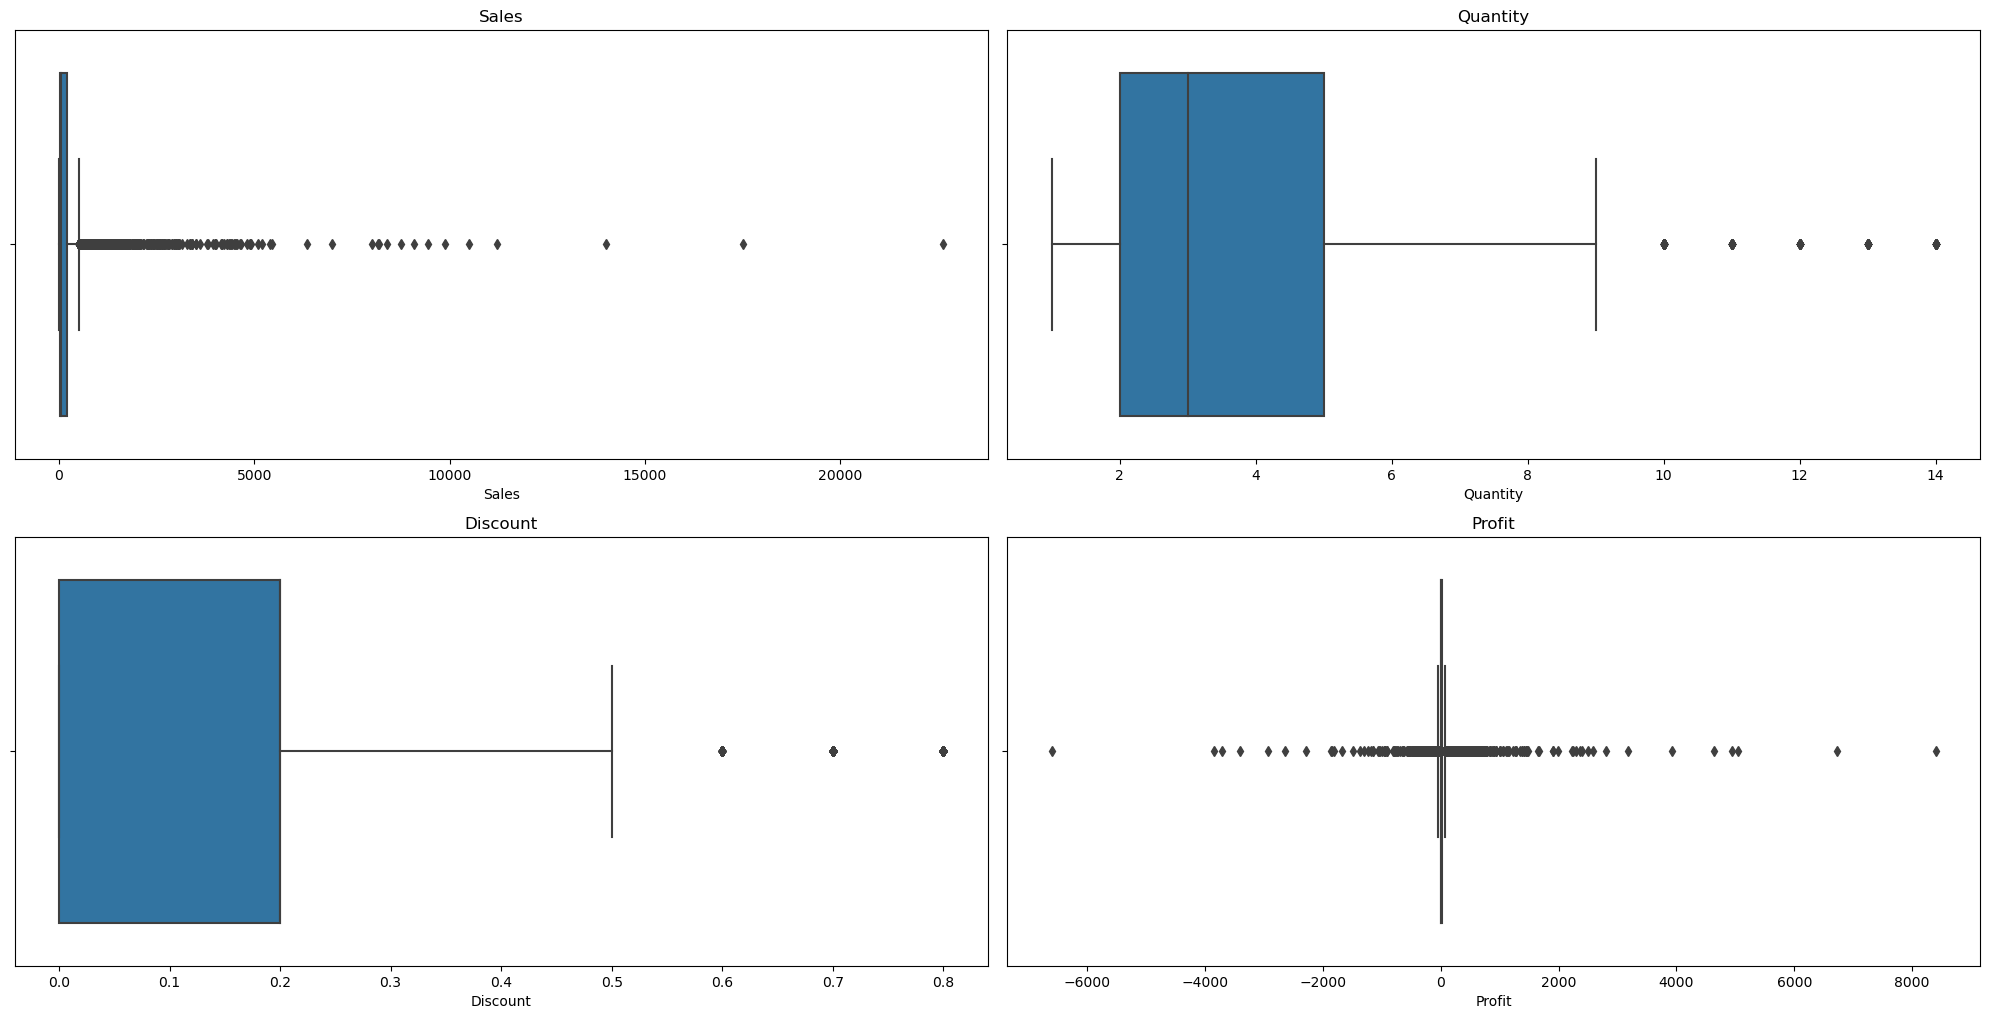

In [88]:
numeric = df.select_dtypes(include='number')
numeric

fig = plt.figure(figsize=(20,20))

count = 0
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    count += 1
    plt.subplot(4,2,count)
    sns.boxplot(numeric, x = column)
    fig.tight_layout()
    plt.title(f'{column}')
plt.show()


In [89]:
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    q1 = df[column].describe().loc['25%']
    q3 = df[column].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"kolom {column} memiliki outliers {jumlah_outliers} lower bound: {lower_bound} upper bound: {upper_bound}")

kolom Sales memiliki outliers 1167 lower bound: -271.71000000000004 upper bound: 498.93
kolom Quantity memiliki outliers 170 lower bound: -2.5 upper bound: 9.5
kolom Discount memiliki outliers 856 lower bound: -0.30000000000000004 upper bound: 0.5
kolom Profit memiliki outliers 1881 lower bound: -39.724125 upper bound: 70.816875


Dari data diatas kita mendapatkan insight: 

1. Sales:
    * outliers 1167 
    * lower bound: -271.71000000000004 
    * upper bound: 498.93
    * Mengindikasikan ada sales yang lebih besar atau lebih kecil dari biasanya. Outliers banyak di range 10000 keatas
2. Quantity:
    * outliers 170 
    * lower bound: -2.5
    * upper bound: 9.5
    * Data terlihat normal tidak ada data yang lebih besar atau lebih kecil dari seharusnya. Outliers ada tapi memang tidak banyak
3. Discount:
    * outliers 856
    * lower bound: -0.30000000000000004
    * upper bound: 0.5
    * data terlihat tidak biasa karena semua berkisar di 0
4. Profit:
    * outliers 1881
    * lower bound: -39.724125
    * upper bound: 70.816875
    * Banyak profit yang tidak normal seprti terlalu besar atau terlalu kecil, terlalu fluktuaktif



Check Anomaly on Sales

In [90]:
minSales = df['Sales'].min()
maxSales = df['Sales'].max()

print(f'minimum sales adalah {minSales}, dan maximal discount adalah {maxSales}. karena tidak ada yang negatif maka bisa dikatakan tidak ada anomali')

minimum sales adalah 0.444, dan maximal discount adalah 22638.48. karena tidak ada yang negatif maka bisa dikatakan tidak ada anomali


In [91]:
salesGrouped = df.groupby('Sales').agg({'Profit': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=True).reset_index()
salesGrouped
totalProfit = salesGrouped['Profit'].sum()
salesGrouped['Sales'] = salesGrouped['Sales'].round(2)
salesGrouped['Profit'] = ((salesGrouped['Profit'] / totalProfit) * 100).round(2).astype(str) + '%'
display(salesGrouped[salesGrouped['Sales'] < 0])
display(salesGrouped.head())

,Sales,Profit,Quantity


,Sales,Profit,Quantity
0,0.44,-0.0%,1
1,0.56,-0.0%,1
2,0.84,-0.0%,1
3,0.85,-0.0%,1
4,0.88,-0.0%,1


Dari ketiga kolom Sales, Quantity, dan Profit tidak ada anomali karena tidak ada sales yg 0. untuk profit memang ada yang minus bisa ada banyak faktor seperti hpp yg naik.

Check Anomaly on Discount

In [92]:
minDiscount = df['Discount'].min()
maxDiscount = df['Discount'].max()

print(f'minimum discount adalah {minDiscount}, dan maximal discount adalah {maxDiscount}. karena tidak ada yang negatif maka bisa dikatakan tidak ada anomali')

minimum discount adalah 0.0, dan maximal discount adalah 0.8. karena tidak ada yang negatif maka bisa dikatakan tidak ada anomali


In [93]:
discountGrouped = df.groupby('Discount').agg({'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Discount', ascending=False).reset_index()

totalProfit = discountGrouped['Profit'].sum()

discountGrouped['Sales'] = discountGrouped['Sales'].round(2)
discountGrouped['Profit'] = ((discountGrouped['Profit'] / totalProfit) * 100).round(2).astype(str) + '%'
discountGrouped['Discount'] = (discountGrouped['Discount'] * 100).round(2).astype(str) + '%'
discountGrouped

,Discount,Profit,Quantity,Sales
0,80.0%,-10.66%,1188,16963.76
1,70.0%,-13.99%,1660,40620.28
2,60.0%,-2.08%,501,6644.70
3,50.0%,-7.16%,241,58918.54
4,45.0%,-0.87%,45,5484.97
5,40.0%,-8.05%,786,116417.78
6,32.0%,-0.83%,105,14493.46
7,30.0%,-3.62%,849,103226.66
8,20.0%,31.54%,13660,764594.37
9,15.0%,0.5%,198,27558.52


Tidak ada anomaly pada discount karena discount gede nyebabin profit kecil, dan discount kecil atau tidak ada dsicount sama sekali memberikan profit yg besar dan qty sales yg paling banyak

Check Anomaly on Profit

In [94]:
profitGrouped = df.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()

totalProfit = profitGrouped['Profit'].sum()

profitGrouped['Sales'] = profitGrouped['Sales'].round(2)
profitGrouped['Profit'] = ((profitGrouped['Profit'] / totalProfit) * 100).round(2).astype(str) + '%'
profitGrouped['Discount'] = (profitGrouped['Discount'] * 100).round(2).astype(str) + '%'
profitGrouped

,Profit,Discount,Quantity,Sales
0,3.78%,0.0%,5,17499.95
1,3.02%,0.0%,4,13999.96
2,2.27%,0.0%,3,10499.97
3,2.23%,0.0%,13,9892.74
4,2.08%,0.0%,5,9449.95
...,...,...,...,...
7282,-1.32%,80.0%,5,1889.99
7283,-1.53%,70.0%,5,2549.98
7284,-1.67%,80.0%,8,2177.58
7285,-1.73%,50.0%,4,7999.98


Dari data diatas terdapat profit yg minus bisa diindikasikan bahwa perusahaan mengalami kesulitan dalam mengambil keuntungan

Check Anomaly on Quantity

In [95]:
minQuantity = df['Quantity'].min()
maxQuantity = df['Quantity'].max()

print(f'minimum quantity adalah {minQuantity}, dan maximal quantity adalah {maxQuantity}. karena tidak ada yang negatif maka bisa dikatakan tidak ada anomali')

minimum quantity adalah 1, dan maximal quantity adalah 14. karena tidak ada yang negatif maka bisa dikatakan tidak ada anomali


In [96]:
qtyGroupedDisc = df.groupby('Quantity')['Discount'].apply(lambda x: list(x)).reset_index()

qtyGrouped = qtyGroupedDisc.merge(df.groupby('Quantity').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index(), on='Quantity')

totalProfit = qtyGrouped['Profit'].sum()

qtyGrouped['Sales'] = qtyGrouped['Sales'].round(2)
qtyGrouped['Profit'] = ((qtyGrouped['Profit'] / totalProfit) * 100).round(2).astype(str) + '%'
qtyGrouped['Discount'] = qtyGrouped['Discount'].apply(lambda x : [f"{rate * 100}%" for rate in x])
qtyGrouped

,Quantity,Discount,Profit,Sales
0,1,"[0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0...",2.6%,53251.93
1,2,"[0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 30.0%, 20.0%, ...",13.42%,289091.48
2,3,"[0.0%, 20.0%, 20.0%, 20.0%, 80.0%, 20.0%, 0.0%...",19.91%,422060.60
3,4,"[0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%...",15.44%,323670.99
4,5,"[45.0%, 0.0%, 80.0%, 60.0%, 0.0%, 0.0%, 10.0%,...",17.29%,415661.70
5,6,"[20.0%, 0.0%, 20.0%, 70.0%, 0.0%, 0.0%, 0.0%, ...",3.61%,207122.32
6,7,"[0.0%, 0.0%, 0.0%, 50.0%, 20.0%, 0.0%, 20.0%, ...",11.97%,239908.37
7,8,"[20.0%, 20.0%, 20.0%, 0.0%, 40.0%, 0.0%, 0.0%,...",3.79%,117760.18
8,9,"[20.0%, 20.0%, 0.0%, 20.0%, 30.0%, 0.0%, 70.0%...",6.18%,128505.59
9,10,"[20.0%, 70.0%, 20.0%, 40.0%, 0.0%, 20.0%, 0.0%...",0.71%,24056.66


Berdasarkan hasil diatas tidak terdapat diskon negatif dengan kisaran 0-80% dengan berbagai penjualan dan keuntungan. karena itu tidak ada anomali pada quantity

Check Anomaly on Country, Region, Sub-Region, City

In [97]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Ch..."
1,APJ,"[Japan, Australia, Philippines, India, Singapo..."
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, Fran..."


Dari hasil di atas ada 3 region yang terdiri dari AMER, APJ, dan EMEA (region Amerika, region Asia-Pasifik dan Jepang, DAN region Eropa, Timur Tengah, dan Afrika). Negara-negara yang tercantum dalam setiap kategori tampaknya sangat cocok dengan kawasan ini berdasarkan lokasi kontinentalnya

In [98]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, I..."
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal,..."
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, ..."
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Ar..."
9,NAMER,"[United States, Canada]"


Dari hasil diatas, kita dapat melihat setiap negara berdasarkan sub wilayah dan terlihat lebih terperinci. 

Sub wilayah cukup berguna menganalisis dan mensegmentasi pasar, memahami perbedaan regional dalam praktik bisnis, dan untuk strategi pemasaran yang ditargetkan.

In [99]:
df.groupby('Subregion')['Country'].count().reset_index()

,Subregion,Country
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


Dari hasil diatas terlihat berapa negara dalam subregion tertentu

In [100]:
df.groupby('Subregion')['City'].count().reset_index()

,Subregion,City
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


Dari hasil diatas terlihat berapa kota dalam subregion tertentu

Check anomaly on Order Id and Order Date

In [101]:
df['Order ID'].nunique()

5009

In [102]:
df.groupby('Order ID')['License'].unique().reset_index()

,Order ID,License
0,AMER-2020-100090,"[4BEAB9UXKH, AVBMH39MTD]"
1,AMER-2020-100279,[NI5MITNJ98]
2,AMER-2020-100363,"[0O2MCUTMFW, 7ZEJI08M1P]"
3,AMER-2020-100762,"[9WNGMUMGIU, QLK9TG5206, V5SQA48WYZ, 5F2LX40BDP]"
4,AMER-2020-100860,[T3NURF3EZL]
...,...,...
5004,EMEA-2023-169810,[JPVQMVT1TD]
5005,EMEA-2023-169817,[SKGEAI56XN]
5006,EMEA-2023-169929,[QWY39JAWLQ]
5007,EMEA-2023-169978,"[X8PDHRO4CY, 72ZYHWG94C]"


In [103]:
df['License'].duplicated().sum()

0

1. Pattern Order ID
    * Order ID memiliki patern Region - tahun - dan sequence number
2. Format license
    * License memiliki format alphannumeric, yang kemungkinan digenerate secara random
3. License
    * Setiap order memiliki license masing-masing

In [104]:
maxDate = df['Order Date'].max()
minDate = df['Order Date'].min()

print(f'Penjualan terjadi di antara tanggal {minDate} sampai {maxDate}')

Penjualan terjadi di antara tanggal 2020-01-04 00:00:00 sampai 2023-12-31 00:00:00


In [105]:
dateGrouped = df.groupby('Order Date')['Sales'].sum().reset_index().sort_values(by='Order Date', ascending=True)
dateGrouped['Sales'] = dateGrouped['Sales'].round(2)
dateGrouped

,Order Date,Sales
0,2020-01-04,16.45
1,2020-01-05,288.06
2,2020-01-06,19.54
3,2020-01-07,4407.10
4,2020-01-08,87.16
...,...,...
1232,2023-12-27,814.59
1233,2023-12-28,177.64
1234,2023-12-29,1657.35
1235,2023-12-30,2915.53


Dari data diatas terlihat memang benar bahwa penjualan dalam range mindate dan maxdate

Check Anomaly on industry, product, segment

In [106]:
df.groupby('Industry')['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneVi..."
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connecto..."
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, ..."
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Ana..."
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Con..."
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data ..."
6,Misc,"[Support, OneView, Data Smasher, SaaS Connecto..."
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneVi..."
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connect..."
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketin..."


Tabel ini mewakili berbagai industri dan produk yang terkait dengan masing-masing industri. Setiap baris mewakili suatu industri, dan kolom 'Produk' berisi daftar produk yang terkait dengan setiap industri.

In [107]:
df.groupby('Segment')['Product'].unique().reset_index()

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connec..."
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, ..."
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Ana..."


Tabel ini mewakili 3 segmen yang meliputi Enterprise, SMB, dan Strategic yang berisi daftar produk yang terkait dengan setiap segmen.

In [108]:
df.groupby('Segment')['Industry'].unique().reset_index()

,Segment,Industry
0,Enterprise,"[Healthcare, Misc, Finance, Energy, Retail, Ma..."
1,SMB,"[Energy, Finance, Tech, Manufacturing, Retail,..."
2,Strategic,"[Energy, Retail, Consumer Products, Manufactur..."


Tabel ini mewakili segmen (Perusahaan, UKM, dan Strategis) yang dikaitkan dengan berbagai industri.

Check normality

C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\2508943497.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\2508943497.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\2508943497.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


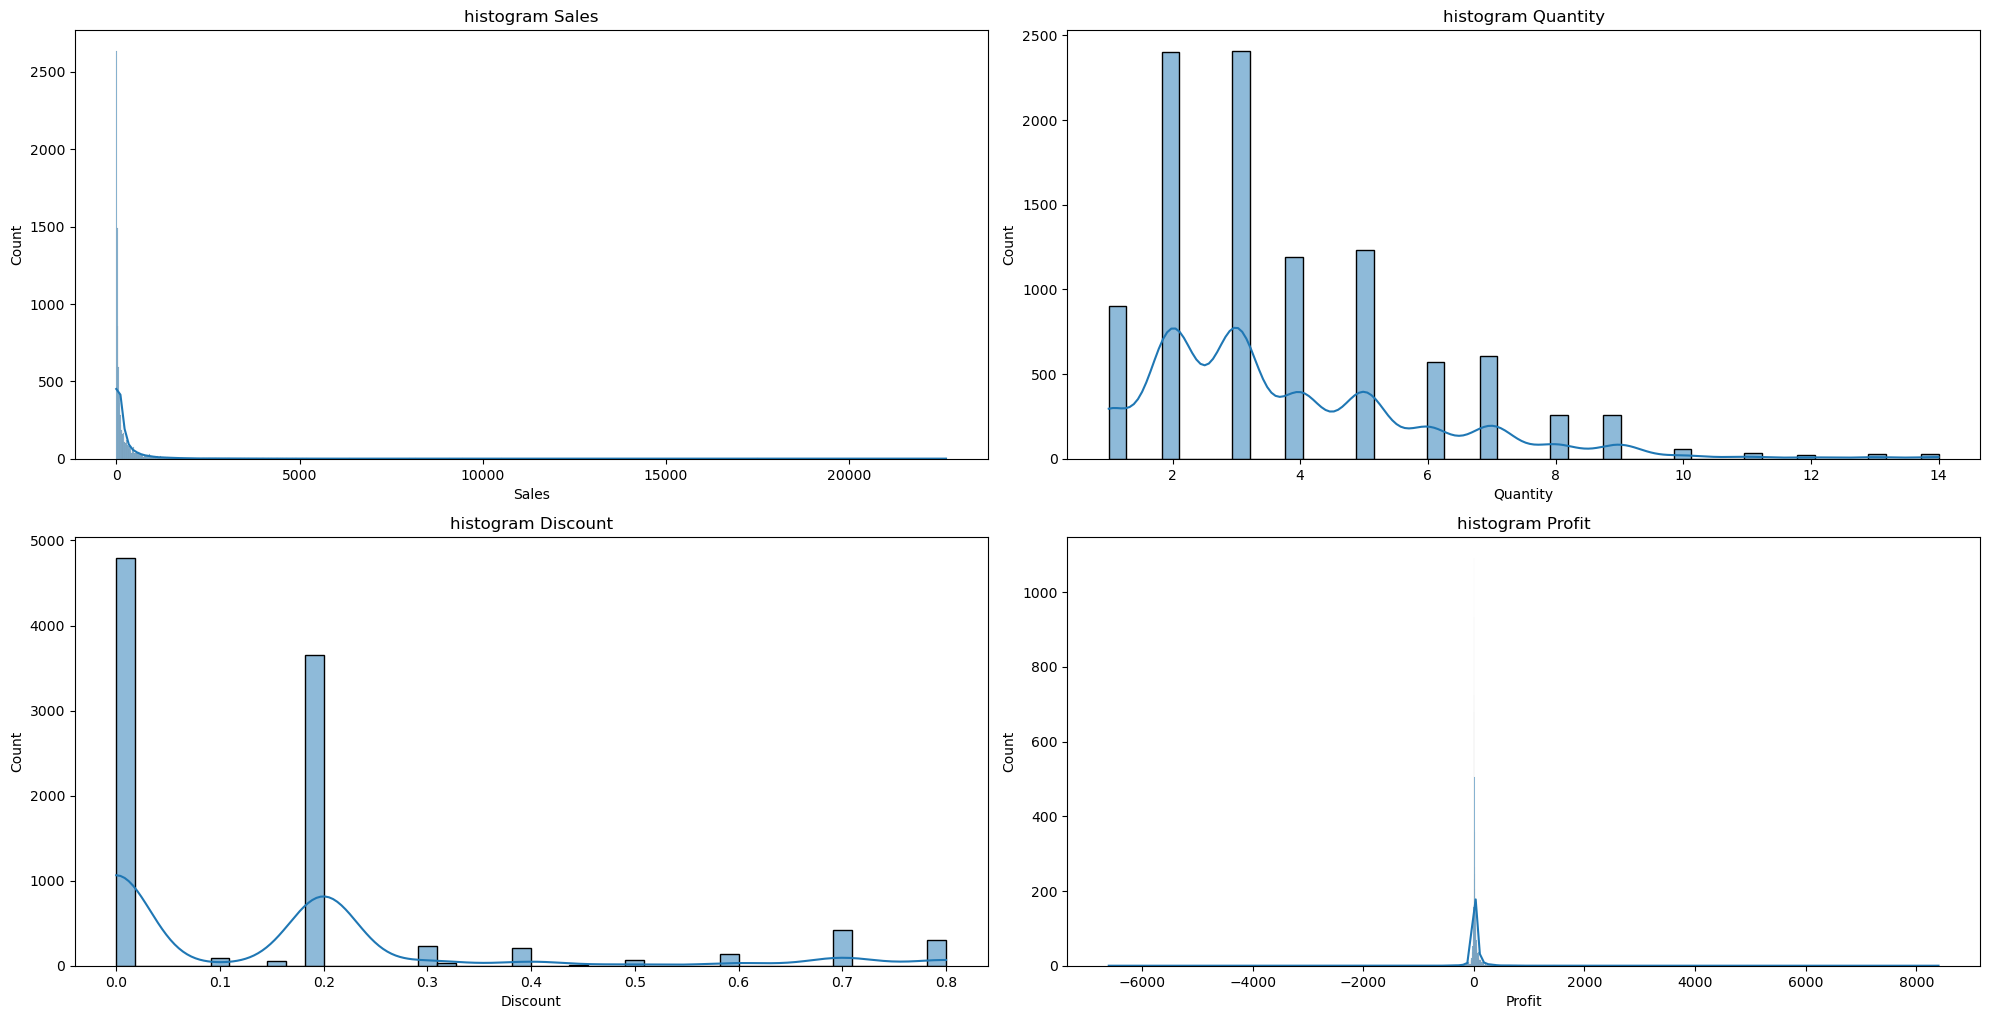

In [109]:
fig = plt.figure(figsize=(20,20))

count = 0
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    count += 1
    plt.subplot(4,2,count)
    sns.histplot(numeric[column], kde=True)
    plt.title(f"histogram {column}")
    fig.tight_layout()
plt.show()


1. Sales:

    * Sebagian besar transaksi memiliki nilai penjualan yang relatif rendah, sementara beberapa transaksi menunjukkan nilai penjualan yang sangat tinggi. Distribusi ini sangat condong ke kanan sehingga data Penjualan tidak normal

2. Quantity:

    * Mayoritas transaksi melibatkan jumlah pembelian kecil, dan beberapa transaksi melibatkan jumlah pembelian yang sangat besar. Distribusi ini juga condong ke kanan sehingga data kuantitas tidak normal

3. Discount:

    * Sebagian besar transaksi tidak menerapkan diskon apa pun, kita dapat melihat diskon 0% memiliki distribusi tertinggi, dan transaksi lainnya biasanya rendah dalam menerapkan diskon pada produknya. Data diskon tidak normal

4. Profit:

    * Laba menunjukkan distribusi yang relatif lebih simetris dibandingkan kolom lainnya, namun masih terdapat beberapa nilai ekstrim pada kedua sisi dengan nilai kurtosis > 3 leptokurtik. Data keuntungan tidak normal

# Data Analysis

## What product contribute negative profit

In [110]:
profitPercent = df.groupby('Product')[['Profit']].sum()
totalProfit = profitPercent['Profit'].sum()
profitPercent['Percentage'] = (profitPercent['Profit']/totalProfit) * 100

profitPercent['Percentage'] = profitPercent['Percentage'].round(2).astype(str) + '%'

profitPercent.sort_values('Percentage', ascending=False)

,Profit,Percentage
Product,,
Marketing Suite - Gold,21278.8264,7.43%
OneView,18138.0054,6.33%
SaaS Connector Pack,13059.1436,4.56%
ContactMatcher,12496.2822,4.36%
SaaS Connector Pack - Gold,6964.1767,2.43%
ChatBot Plugin,6527.7870,2.28%
Alchemy,55617.8249,19.42%
Site Analytics,44515.7306,15.54%
Data Smasher,41936.6357,14.64%


C:\Users\Kevin Petrasave\AppData\Local\Temp\ipykernel_9652\3021463801.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(df, x = 'Profit', y = 'Product',ci=0, estimator='sum',order= df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)


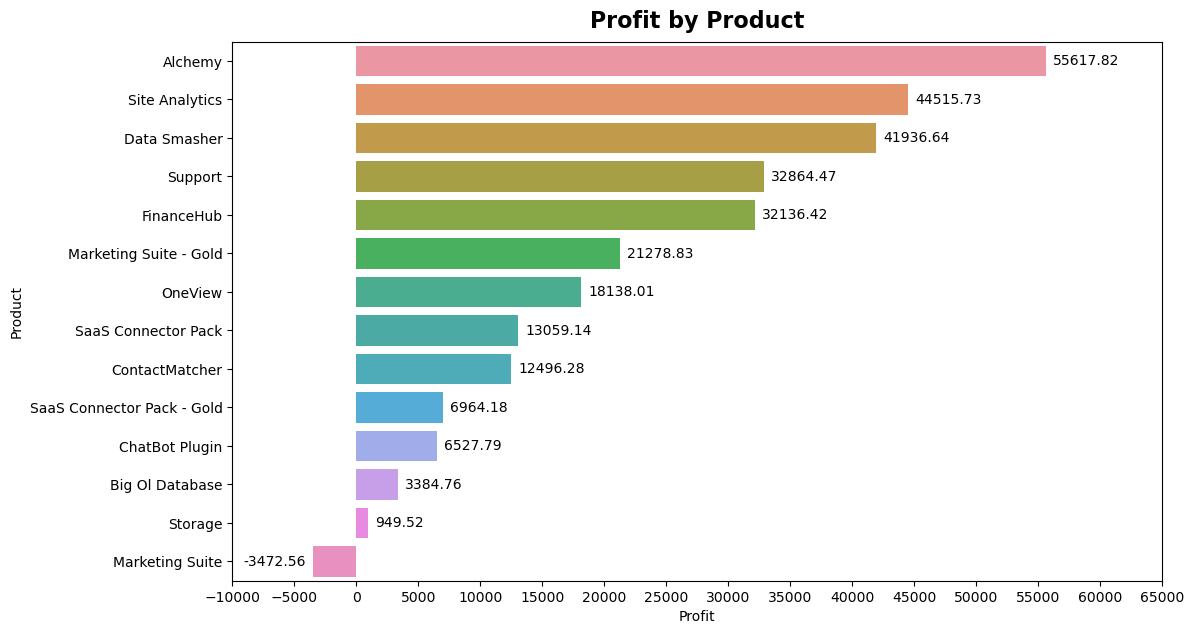

In [111]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(df, x = 'Profit', y = 'Product',ci=0, estimator='sum',order= df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)
container = ax.containers[0]
profitValues =[f'{x:.2f}' for x in container.datavalues]
ax.bar_label(container, labels=profitValues, padding=5)
plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xticks(range(-10000, 65001, 5000))
plt.show()

1. Positive Profit Products:
    * Produk dengan profit positif adalah Alchemy, Site Analytics, Data Smasher, Support, Finance Hub, Marketing Suite - Gold, OneView, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, Chatbot Plugin, Big OI Database, Storage
    * Alchemy, Site Analytics, Data Smasher merupakan top 3 yang menyumbang keuntungan terbanyak untuk perushaaan

2. Negative Profit Products:
    * Produk dengan profit negatif adalah Marketing Suite yang menunjukkan kerugian pada perusahaan


Produk Alchemy, Site Analytics, Data Smasher merupakan produk yang sangat menguntungkan bagi perushaaan, akan tetapi Marketing Suite menunjukan kerugian yang perlu penyelidikan lebih lanjut.

In [112]:
productProfit = df.groupby('Product')[['Profit']].sum()
totalProfit = productProfit['Profit'].sum()
productProfit['Profitable'] = productProfit['Profit'] > 0

productProfit.sort_values('Profit', ascending=False)

,Profit,Profitable
Product,,
Alchemy,55617.8249,True
Site Analytics,44515.7306,True
Data Smasher,41936.6357,True
Support,32864.4698,True
FinanceHub,32136.4203,True
Marketing Suite - Gold,21278.8264,True
OneView,18138.0054,True
SaaS Connector Pack,13059.1436,True
ContactMatcher,12496.2822,True


22297.659823076923

-3472.556

<BarContainer object of 2 artists>

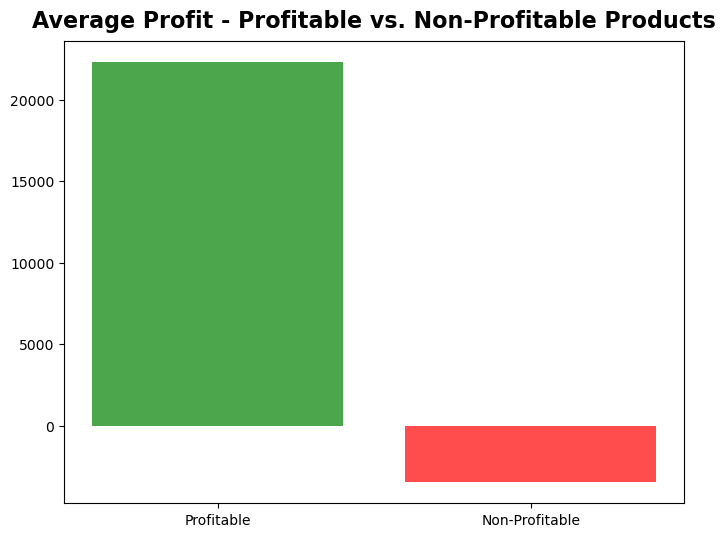

In [113]:
profitProducts = productProfit[productProfit['Profitable'] == True]
unprofitProducts = productProfit[productProfit['Profitable'] == False]
profitProductsStats = profitProducts['Profit'].describe()
unprofitProductsStats = unprofitProducts['Profit'].describe()

profitMean = profitProductsStats['mean']
unprofitMean = unprofitProductsStats['mean']

display(profitMean, unprofitMean)

plt.figure(figsize=(8, 6))
plt.title('Average Profit - Profitable vs. Non-Profitable Products', size=16, pad=10, fontweight='bold')
plt.bar(['Profitable', 'Non-Profitable'], [profitMean, unprofitMean],
               color=['green', 'red'], alpha=0.7)

1. Grafik membandingkan rata-rata produk yang menguntungkan dan rata-rata produk yang tidak menguntungkan
2. Produk yang menguntungkan memiliki rata-rata keuntungan 22297.65
3. Produk yang tidak menuntungkan memiliki rata-rata kerugian sebesar -3472.556

ini menunjukan ada perbedaan siginifikan antara produk yang menguntugkan dan yang tidak menguntungkan

### Memilih produk yang memiliki keuntungan yang negatif

In [114]:
msDf = df[df['Product'] == 'Marketing Suite']
msDf

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Margin
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
27,28,EMEA-2021-150630,2021-09-17,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00
38,39,APJ-2021-117415,2021-12-27,20211227,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82
189,190,EMEA-2021-102281,2021-10-12,20211012,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50
192,193,EMEA-2021-102281,2021-10-12,20211012,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,9742,EMEA-2021-117086,2021-11-08,20211108,Pippa Hunter,Egypt,Cairo,EMEA,MEA,Samsung Electronics,1015,Tech,Strategic,Marketing Suite,OO12JK36OM,4404.9000,5,0.00,1013.1270,23.00
9769,9770,EMEA-2022-123533,2022-11-25,20221125,Angela Churchill,Germany,Hanover,EMEA,EU-WEST,Valero Energy,1093,Energy,Enterprise,Marketing Suite,OAFIREBUR5,339.9200,5,0.20,8.4980,2.50
9787,9788,APJ-2023-144491,2023-03-28,20230328,Blake Fraser,Japan,Tokyo,APJ,JAPN,UnitedHealth Group,1092,Healthcare,SMB,Marketing Suite,0I7Q4V57MU,1023.3320,5,0.32,-30.0980,-2.94
9931,9932,AMER-2021-104948,2021-11-13,20211113,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,1004,Tech,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960,-5.88


In [115]:
msDfCopy = msDf.copy()

Sales Monthly

In [116]:
msDfCopy['Order Date'] = pd.to_datetime(df['Order Date'])

msDfCopy['Order Month'] = msDfCopy['Order Date'].dt.to_period('M')
msDfCopy['Order Year'] = msDfCopy['Order Date'].dt.to_period('Y')

msDfCopy

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Margin,Order Month,Order Year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022-11,2022
27,28,EMEA-2021-150630,2021-09-17,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,...,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00,2021-09,2021
38,39,APJ-2021-117415,2021-12-27,20211227,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,...,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82,2021-12,2021
189,190,EMEA-2021-102281,2021-10-12,20211012,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,...,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50,2021-10,2021
192,193,EMEA-2021-102281,2021-10-12,20211012,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,...,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50,2021-10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,9742,EMEA-2021-117086,2021-11-08,20211108,Pippa Hunter,Egypt,Cairo,EMEA,MEA,Samsung Electronics,...,Strategic,Marketing Suite,OO12JK36OM,4404.9000,5,0.00,1013.1270,23.00,2021-11,2021
9769,9770,EMEA-2022-123533,2022-11-25,20221125,Angela Churchill,Germany,Hanover,EMEA,EU-WEST,Valero Energy,...,Enterprise,Marketing Suite,OAFIREBUR5,339.9200,5,0.20,8.4980,2.50,2022-11,2022
9787,9788,APJ-2023-144491,2023-03-28,20230328,Blake Fraser,Japan,Tokyo,APJ,JAPN,UnitedHealth Group,...,SMB,Marketing Suite,0I7Q4V57MU,1023.3320,5,0.32,-30.0980,-2.94,2023-03,2023
9931,9932,AMER-2021-104948,2021-11-13,20211113,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,...,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960,-5.88,2021-11,2021


In [117]:
msSales = msDfCopy.groupby('Order Month')[['Sales']].median().reset_index()
msSales['Sales'] = msSales['Sales'].round(2)

msSales

,Order Month,Sales
0,2020-01,161.72
1,2020-02,290.67
2,2020-03,302.45
3,2020-04,308.50
4,2020-05,320.32
5,2020-06,212.94
6,2020-07,743.84
7,2020-08,397.14
8,2020-09,436.00
9,2020-10,617.00


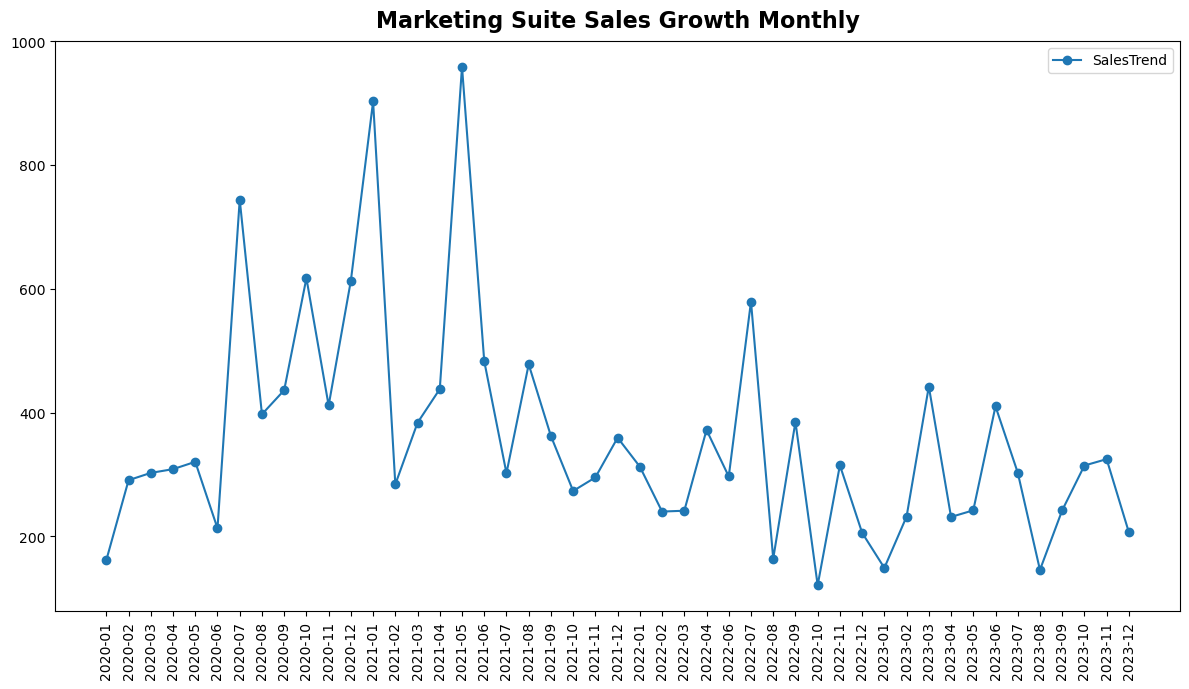

In [118]:
plt.figure(figsize=(12,7))

plt.plot(msSales['Order Month'].astype(str), msSales['Sales'], marker='o', linestyle = '-', label= 'SalesTrend')
plt.xticks(rotation=90)
plt.legend()
plt.title('Marketing Suite Sales Growth Monthly', size=16, pad=10, fontweight='bold')
plt.tight_layout()
plt.show()

1. Terjadi penjualan yang sangat fluktuatif dari Januari 2020 sampai Desember 2023
2. Puncak penjualan terjadi pada Mei 2021. Mengindikasikan suksesnya strategi bisnis atau puncak high season
3. Penjulan terendah terjadi pada Oktober 2022. Mengindikasikan slow sales atau kurangnya strategi bisnis
4. Trend terakhir jika diliat dari beberapa bulan terakhir, penjualan berkisar diantara 200 - 400. Meskipun mengalami penurunan drastis pada Agustus 2023 

Profit Monthly

In [119]:
msProfit = msDfCopy.groupby('Order Month')[['Profit']].median().reset_index()
msProfit['Profit'] = msProfit['Profit'].round(2)

msProfit

,Order Month,Profit
0,2020-01,-24.68
1,2020-02,3.42
2,2020-03,-12.10
3,2020-04,-18.15
4,2020-05,-94.81
5,2020-06,-19.87
6,2020-07,133.47
7,2020-08,82.35
8,2020-09,-10.02
9,2020-10,-36.29


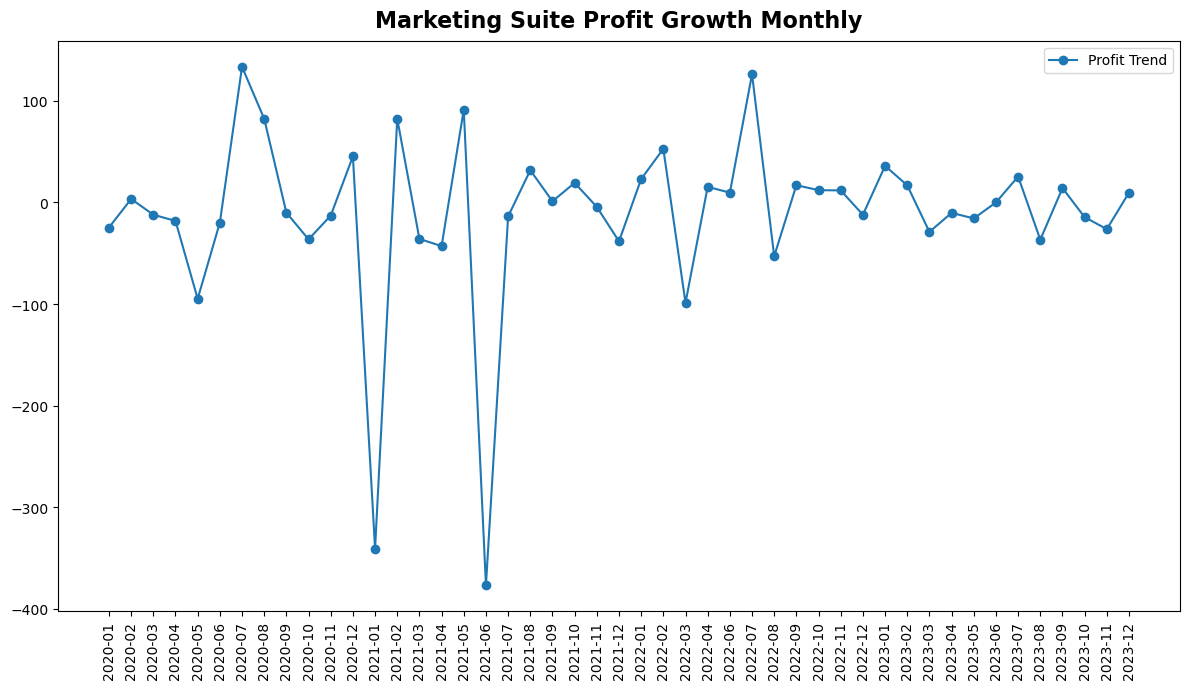

In [120]:
plt.figure(figsize=(12,7))

plt.plot(msProfit['Order Month'].astype(str), msProfit['Profit'], marker='o', linestyle = '-', label= 'Profit Trend')
plt.xticks(rotation=90)
plt.legend()
plt.title('Marketing Suite Profit Growth Monthly', size=16, pad=10, fontweight='bold')
plt.tight_layout()
plt.show()

1. Profit yang sangat fluktuatif dari Januari 2020 sampai Desember 2023. Ini bisa terjadi karena beberapa faktor seperti perubahan sales, kenaikan hpp, biaya operasional, dll.
2. Puncak Profit terjadi pada Juli 2020 dengan keuntungan sebanyak 133.47. Mengindikasikan suksesnya strategi bisnis atau puncak high season
3. Profit terendah terjadi pada Juni 2021 dengan total kerugian sebanyak -376.69. Mengindikasikan slow sales atau kurangnya strategi bisnis
4. Trend terakhir jika diliat dari beberapa bulan terakhir, penjualan berkisar diantara -40 sampai 40. Meskipun mengalami penurunan drastis pada Agustus 2023 

Margin Monthly

In [121]:
msMargin = msDfCopy.groupby('Order Month')[['Margin']].median().reset_index()
msMargin['Margin'] = msMargin['Margin'].round(2)

msMargin

,Order Month,Margin
0,2020-01,-42.41
1,2020-02,1.18
2,2020-03,-5.88
3,2020-04,-5.88
4,2020-05,-26.30
5,2020-06,-10.29
6,2020-07,12.44
7,2020-08,11.00
8,2020-09,-1.25
9,2020-10,-5.88


margin profit dalam %

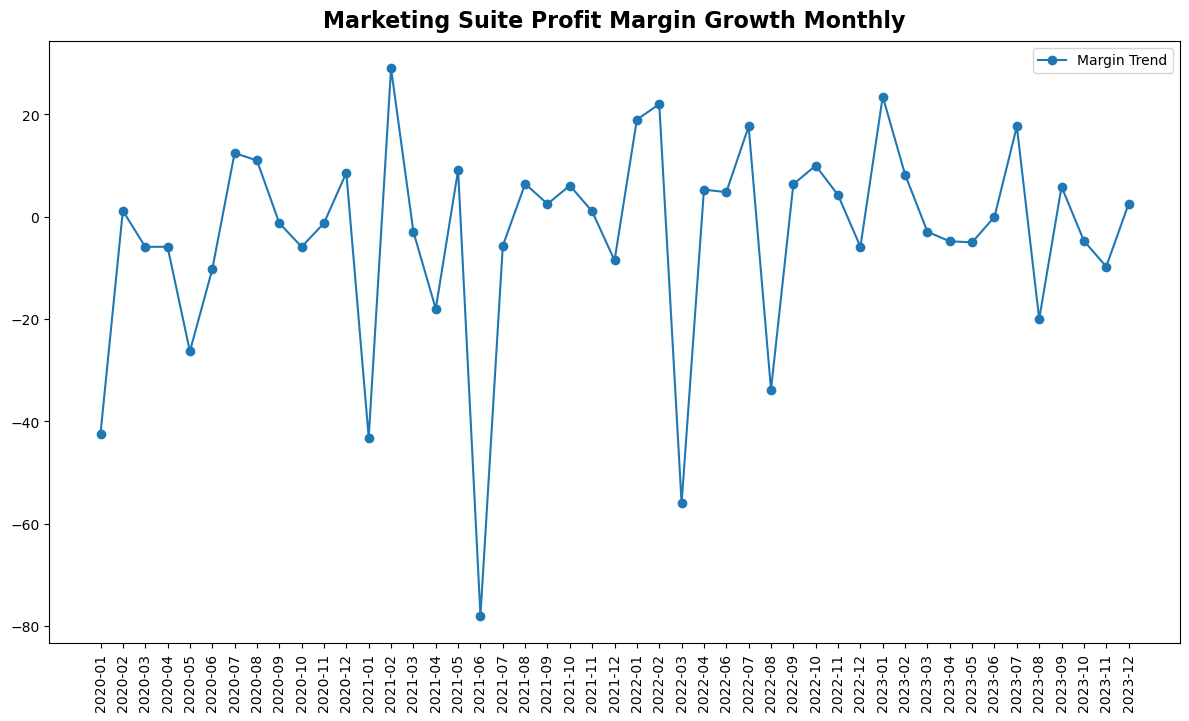

In [122]:
plt.figure(figsize=(12,7))

plt.plot(msMargin['Order Month'].astype(str), msMargin['Margin'], marker='o', linestyle = '-', label= 'Margin Trend')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.title('Marketing Suite Profit Margin Growth Monthly', size=16, pad=10, fontweight='bold')
plt.show()

1. Margin Profit yang sangat fluktuatif dari Januari 2020 sampai Desember 2023. Ini bisa terjadi karena beberapa faktor seperti perubahan sales, kenaikan hpp, biaya operasional, dll.
2. Puncak margin profit terjadi pada Februari 2021 dengan margin profit sebesar 29%. Mengindikasikan suksesnya strategi bisnis atau puncak high season
3. Margin profit terendah terjadi pada Juni 2021 dengan total kerugian sebesar 78%. Mengindikasikan slow sales atau kurangnya strategi bisnis
4. Trend terakhir jika diliat dari beberapa bulan terakhir, margin profit berkisar diantara -10 sampai 20%. Meskipun mengalami penurunan drastis pada Agustus 2023 

Discount Monthly

In [123]:
msDisc = msDfCopy.groupby('Order Month')[['Discount']].median().reset_index()
msDisc['Discount'] = msDisc['Discount'] * 100

msDisc.head()

,Order Month,Discount
0,2020-01,32.5
1,2020-02,15.0
2,2020-03,15.0
3,2020-04,15.0
4,2020-05,32.5


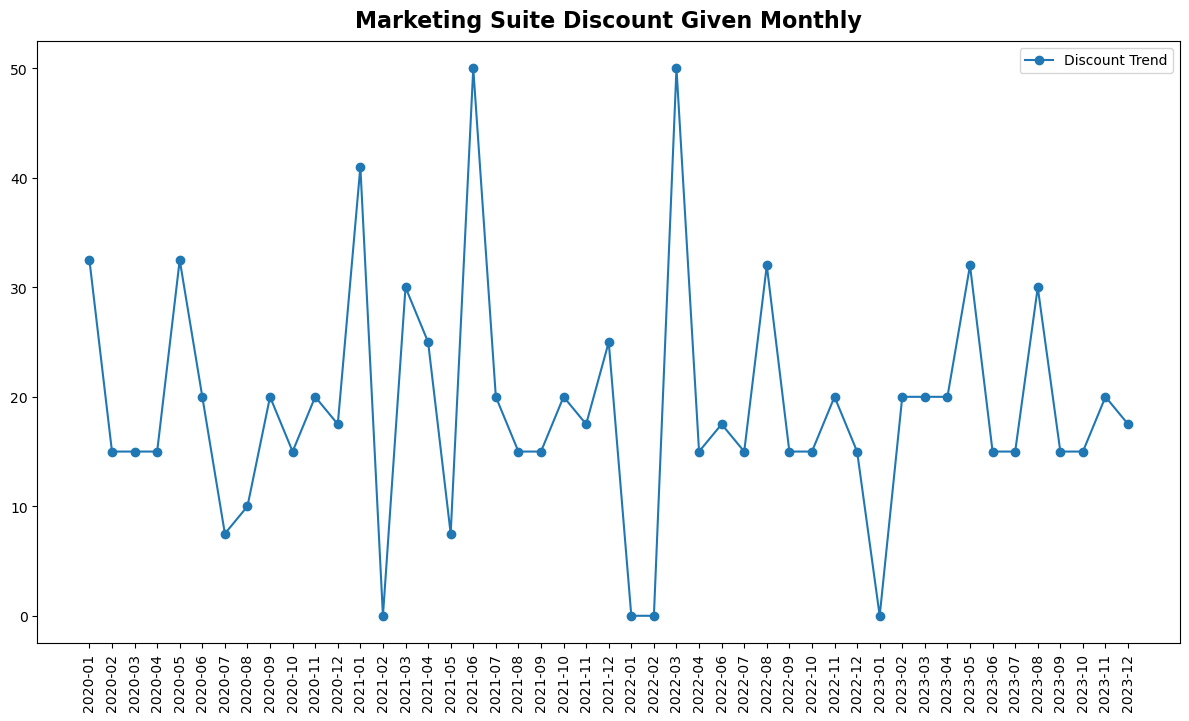

In [124]:
plt.figure(figsize=(12,7))

plt.plot(msDisc['Order Month'].astype(str), msDisc['Discount'], marker='o', linestyle = '-', label= 'Discount Trend')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.title('Marketing Suite Discount Given Monthly', size=16, pad=10, fontweight='bold')
plt.show()

1. Pemberian diskon bervariasi dari yang tertinggi 50% dan yang terendah tidak ada diskon atau 0% diskon. Terlihat tidak ada trend karena selalu fluktuatif tiap bulan ke bulan

2. Diskon tertinggi yang diberikan adalah 50% yang diberikan di Juni 2021 dan Maret 2022

3. Diskon terendah 0% atau tidak ada diskon pada Februari 2021, Januari - Februari 2022, dan Januaei 2023

4. Trend beberapa bulan kebelakang diskon yg diberikan berkisar di 15% - 32% kecuali di Januari 2023 tidak diberikan diskon

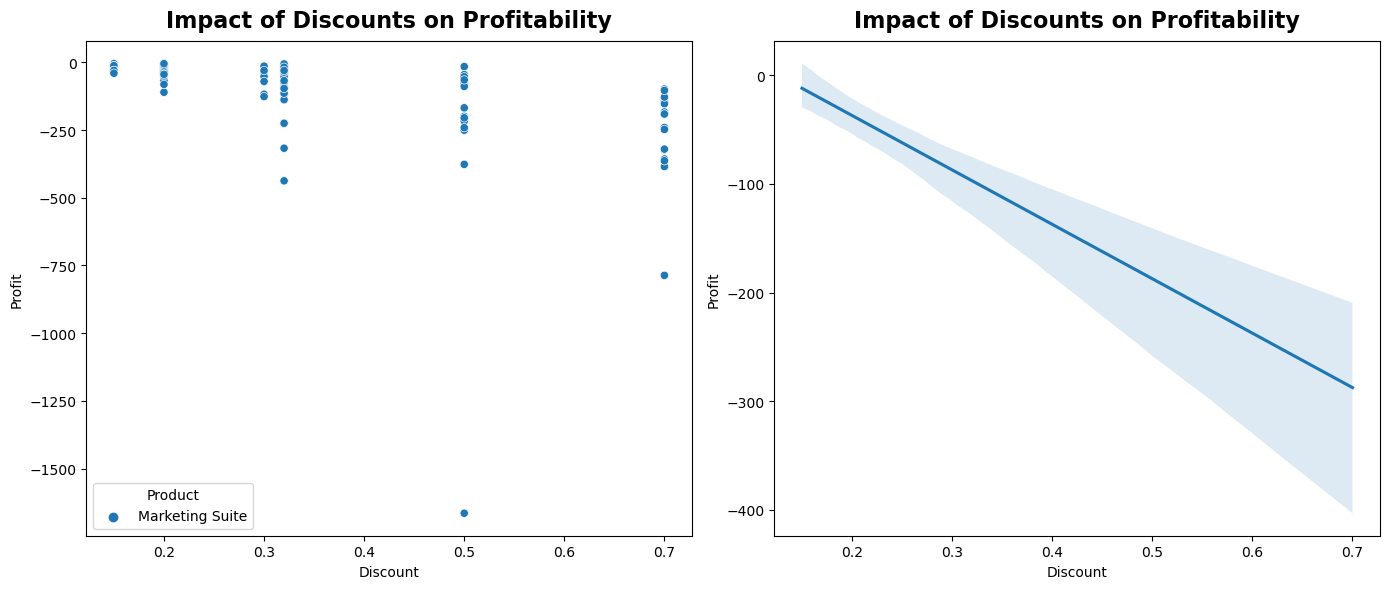

In [125]:
negative_profit_products = msDf[msDf['Profit'] < 0]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.scatterplot(x='Discount', y='Profit', data=negative_profit_products, hue='Product', ax=ax1)
ax1.set_title('Impact of Discounts on Profitability', size=16, pad=10, fontweight='bold')

sns.regplot(x='Discount', y='Profit', data=negative_profit_products, scatter=False, ax=ax2)
ax2.set_title('Impact of Discounts on Profitability', size=16, pad=10, fontweight='bold')
plt.tight_layout()
plt.show()

Dari Grafik terlihat adanya korelasi negatif antara diskon dengan profit, dimana ketika diskon yang diberikan tinggi maka keuntungannya rendah. Hal ini membuat Marketing Suite mengalami kerugian karena kenaikan diskon yang berbanding terbalik dengan keuntungan

#### Customer Segmentation

In [126]:
msRegion = msDfCopy.groupby('Region')['Profit'].sum().sort_values(ascending=False)
msRegion

Region
AMER      52.7756
EMEA   -1629.6682
APJ    -1895.6634
Name: Profit, dtype: float64

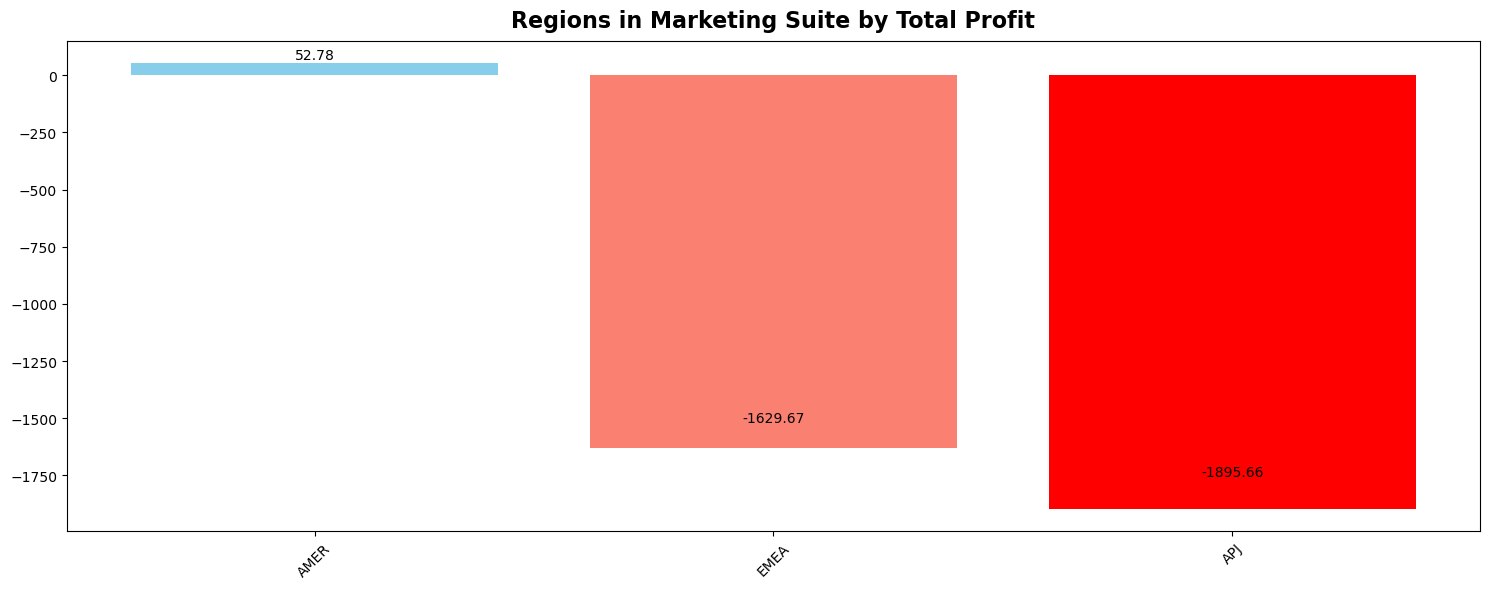

In [127]:
plt.figure(figsize=(15, 6))

colors = ['skyblue', 'salmon', 'red']

for i, (index, value) in enumerate(msRegion.head().items()):
    plt.bar(index, value, color=colors[i])
    
    text_position = value + 0.1 * value if value >= 0 else value - 0.1 * value
    plt.text(i, text_position, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Regions in Marketing Suite by Total Profit', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. AMER menjadi satu-satunya region yang profit dengan total profit sebesar 52.78
2. EMEA dan APJ mengalama kerugian, masing-masing sebesar -1629.67 dan -1895.66
3. Ada perbedaan signifikan antara keuntungan di AMER dan kerugian di EMEA dan APJ

Data ini menunjukan bahwa Marketing Suite mempunyai performa yang cukup bagus di AMER, dan menghadapi tantangan di EMEA dan APJ

In [128]:
msSubRegion = msDfCopy.groupby('Subregion')['Profit'].sum().sort_values(ascending=False)
msSubRegion

Subregion
NAMER      1988.9969
MEA        1854.2242
APAC       1051.3469
NOR         914.7602
EU          650.7630
UKIR        392.7880
ANZ        -555.8726
LATAM     -1936.2213
EU-EAST   -2184.3301
JAPN      -2391.1377
EU-WEST   -3257.8735
Name: Profit, dtype: float64

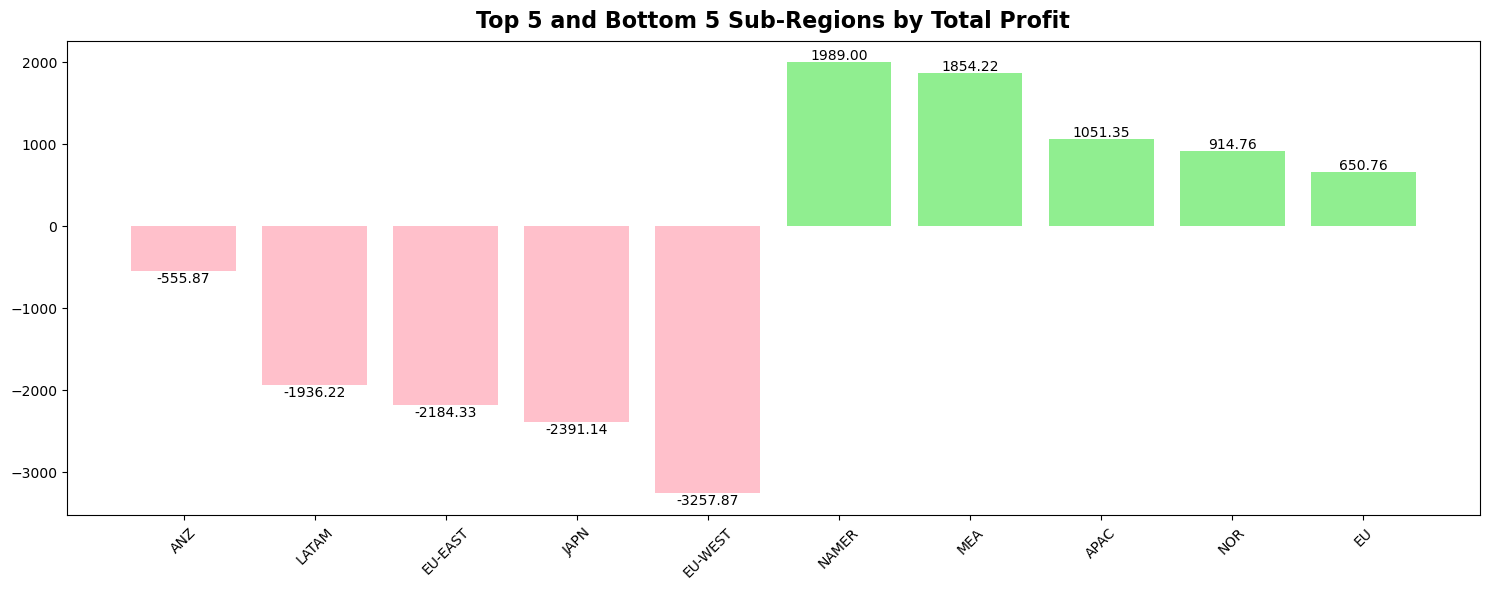

In [129]:
top5 = msSubRegion.tail(5)
bottom5 = msSubRegion.head(5)

combinedData = pd.concat([top5, bottom5])

plt.figure(figsize=(15, 6))

colors = ['pink'] * 5 + ['lightgreen'] * 5

for i, (index, value) in enumerate(combinedData.items()):
    plt.bar(index, value, color=colors[i])
    
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 Sub-Regions by Total Profit', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. NAMER, MEA, APAC, NDR, EU adalah top 5 sub region yang menguntungkan dengan masing-masing profit sebesar 1989, 1854.22, 1051.35, 914.76, 650.76

2. ANZ, LATAM, EU-EAST, JAPN, EU-WEST adalah top 5 sub region yang merugi dengan masing-masing kerugian sebesar -555.87, -1936.22, -2184.33, -2391.14, -3257.87

3. NAMER adalah sub region yang paling menguntungkan dan EU-WEST adalah sub region yang paling merugi

Dari data di atas menunjukan bahwa Marketing Suite mempunyai performa yang cukup baik di NAMER, MEA, APAC, NDR, EU dan mengalami kesulitan atau tantangan di ANZ, LATAM, EU-EAST, JAPN, EU-WEST

In [130]:
msCountry = msDfCopy.groupby('Country')['Profit'].sum().sort_values(ascending=False).reset_index()
msCountry

,Country,Profit
0,United States,1418.9915
1,Egypt,1013.1270
2,Finland,883.2620
3,Italy,650.7630
4,Canada,570.0054
5,Philippines,476.9343
6,Saudi Arabia,456.6770
7,South Korea,414.0936
8,United Kingdom,350.8744
9,Spain,278.7892


In [131]:
import urllib3

urllib3.disable_warnings()

In [132]:
import requests
from geopy.geocoders import Nominatim

def get_country_coordinates(country_name):
    geolocator = Nominatim(user_agent="geoapi")
    
    # Use requests without SSL verification
    session = requests.Session()
    session.verify = False
    
    url = f"https://nominatim.openstreetmap.org/search?q={country_name}&format=json&limit=1"
    response = session.get(url)
    if response.ok:
        data = response.json()
        if data:
            latitude = float(data[0]['lat'])
            longitude = float(data[0]['lon'])
            return latitude, longitude
    return None, None

# Add latitude and longitude columns to df_Country
latitude = []
longitude = []
for i in msCountry['Country']:
    lat, long = get_country_coordinates(i)
    latitude.append(lat)
    longitude.append(long)

msCountry['Latitude'] = latitude
msCountry['Longitude'] = longitude

msCountry


,Country,Profit,Latitude,Longitude
0,United States,1418.9915,39.783730,-100.445882
1,Egypt,1013.1270,26.254049,29.267547
2,Finland,883.2620,63.246778,25.920916
3,Italy,650.7630,42.638426,12.674297
4,Canada,570.0054,61.066692,-107.991707
5,Philippines,476.9343,12.750349,122.731210
6,Saudi Arabia,456.6770,25.624262,42.352833
7,South Korea,414.0936,36.638392,127.696119
8,United Kingdom,350.8744,54.702354,-3.276575
9,Spain,278.7892,39.326068,-4.837979


In [133]:
import folium

# Create a Folium map centered around the first coordinate pair
world_map = folium.Map(location=[msCountry['Latitude'][0], msCountry['Longitude'][0]], zoom_start=3)

# Add markers for each country
for i in range(len(msCountry)):
    # Determine marker color based on profit value
    if msCountry['Profit'][i] < 0:
        marker_color = 'red'  # Markers with negative profit values will be red
    else:
        marker_color = 'blue'  # Markers with non-negative profit values will be blue
    
    folium.Marker(
        location=[msCountry['Latitude'][i], msCountry['Longitude'][i]],
        popup=f"Country: {msCountry['Country'][i]}, Profit: {msCountry['Profit'][i]}",
        tooltip=msCountry['Country'][i],
        icon=folium.Icon(color=marker_color)
    ).add_to(world_map)

world_map

Negara dengan Positive Profit (Blue):
1. United States	1418.9915
2. Egypt	1013.1270
3. Finland	883.2620
4. Italy	650.7630
5. Canada	570.0054
6. Philippines	476.9343
7. Saudi Arabia	456.6770
8. South Korea	414.0936
9. United Kingdom	350.8744
10. Spain	278.7892
11. Turkey	218.2624
12. United Arab Emirates	172.4814
13. Brazil	150.6456
14. Argentina	141.3920
15. Norway	129.4762
16. Ukraine	126.2250
17. China	105.6054
18. Czech Republic	57.1928
19. Singapore	54.7136
20. Poland	53.2350
21. Ireland	41.9136
22. Israel	41.1684
23. Croatia	39.7488

Negara dengan Negative Profit (Red):
1. South Africa	-6.3236
2. Sweden	-97.9780
3. Germany	-116.0706
4. Australia	-555.8726
5. Belgium	-616.8158
6. Chile	-869.2073
7. Mexico	-1359.0516
8. Japan	-2391.1377
9. Russia	-2408.9163
10. France	-2896.7601

1. United State, Egypt, Finland adalah salah tiga negara yang profit dengan masing-masing keuntungan sebesar 1418.99, 1013.13, 883.26

2. Japan, Rusia, France adalah salah tiga negara yg mengalami kerugian dengan masing-masing kerugian sebesar -2391.14, -2408.92, -2896.77

3. United States merupakan negara dengan keuntungan tertinggi dan France merupakan negara dengan kerugian tertinggi


Dari data ini terlihat bahwa Marketing Suite mempunyai performa yang cukup baik di United States, Egypt, Finalnd, dan mengalami kesulitan di Japan, Rusia, France. Stretegi dari negara-negara yang rugi perlu untuk diperbaharui untuk mengimprove performa Marketing Suite

In [134]:
msCity = msDfCopy.groupby('City')['Profit'].sum().sort_values(ascending=False)
msCity

City
Cairo            1013.1270
Los Angeles       669.9770
Toronto           570.0054
New York City     499.7230
Helsinki          463.3536
                   ...    
Moscow           -653.1820
Mexico City      -884.9520
Tokyo           -1120.4223
St Petersburg   -1331.3179
Paris           -2568.1413
Name: Profit, Length: 100, dtype: float64

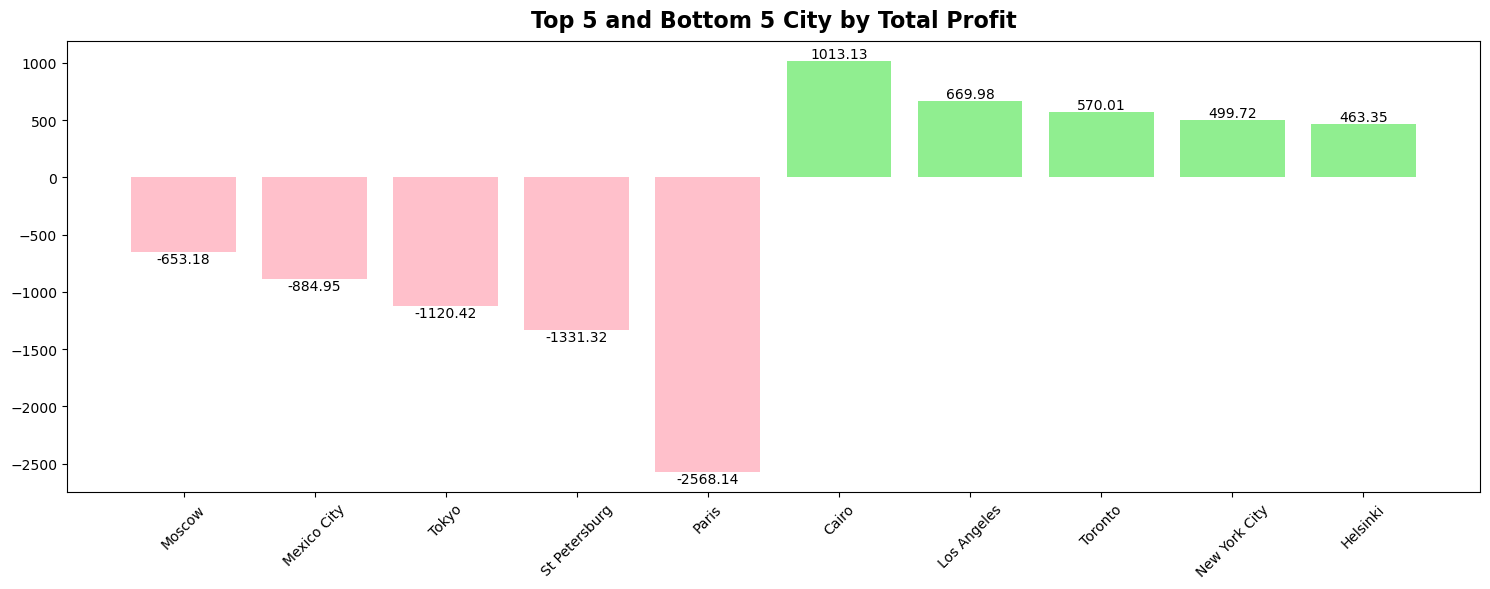

In [135]:
top5 = msCity.tail(5)
bottom5 = msCity.head(5)

combinedData = pd.concat([top5, bottom5])

plt.figure(figsize=(15, 6))

colors = ['pink'] * 5 + ['lightgreen'] * 5

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(combinedData.items()):
    plt.bar(index, value, color=colors[i])
    
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 City by Total Profit', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. Cairo, Los Angeles, Toronto, New York City, Helsinki adalah top 5 kota yang menguntungkan dengan masing-masing profit sebesar 1013.13, 669.98, 570.01, 499.72, 463.35

2. Moscow, Mexico City, Tokyo, St.Petersburg, Paris adalah top 5 kota yang merugi dengan masing-masing kerugian sebesar -653.18, -884.95, -1120.42, -1331.32, -2658.14

3. Cairo adalah kota yang paling menguntungkan dan Paris     adalah kota yang paling merugi

Dari data di atas menunjukan bahwa Marketing Suite mempunyai performa yang cukup baik di Cairo, Los Angeles, Toronto, New York City, Helsinki dan mengalami kesulitan atau tantangan di Moscow, Mexico City, Tokyo, St.Petersburg, Paris.

In [136]:
segmentProporsition = msDfCopy['Segment'].value_counts()/len(msDf)
segmentProporsition

Segment
SMB           0.574561
Strategic     0.280702
Enterprise    0.144737
Name: count, dtype: float64

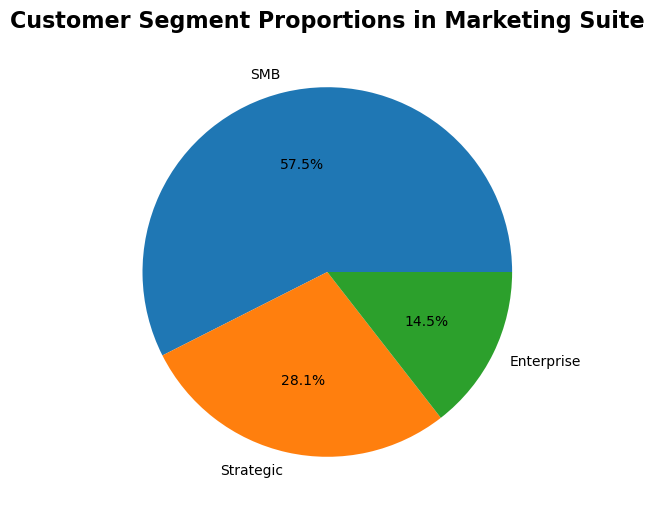

In [137]:
plt.figure(figsize=(14, 6))


plt.pie(
    segmentProporsition.values,
    labels=segmentProporsition.index,
    autopct='%1.1f%%'
)

plt.title('Customer Segment Proportions in Marketing Suite',size=16, pad=10, fontweight='bold')
plt.show()

1. SMB merupakan segment terbesar dengan proporsi sebesar 57.5%
2. Strategic memmpunyai proporsi 28,1%
3. Enterprise segment terkecil dengan proporsi 14.5%

Data ini berguna untuk memahami basis pelanggan dan menentukan strategi yg tepat. Misalnya dengan lebih mengoptimalkan pemasaran kepada segment SMB karena mayoritas pengguna Marketing Suite.

Hipotesis segment VS Profit

Menggunakan Kruskal Wallis karena mempunya dua atau lebih segment dan data yg kita punya tidak normal

(H0): Tidak ada perbedaan median profit dari ketiga segment."

(Ha): Setidaknya ada satu yang berbeda dari yang lain."

H0 = Median profit SMB = Median profit Strategic = Median profit Enterprise

Ha = Median profit SMB ≠ Median profit Strategic = Median profit Enterprise

In [138]:
from scipy.stats import kruskal

In [139]:
segments = ['SMB', 'Strategic', 'Enterprise']
filterdDf = msDfCopy[msDfCopy['Segment'].isin(segments) & (msDfCopy['Profit'] < 0)]

smbProfit = filterdDf[filterdDf['Segment'] == 'SMB']['Profit']
strategicProfit = filterdDf[filterdDf['Segment'] == 'Strategic']['Profit']
enterpriseProfit = filterdDf[filterdDf['Segment'] == 'Enterprise']['Profit']

stat, pValue = kruskal(smbProfit, strategicProfit, enterpriseProfit)

if pValue < 0.05:
    print('Tidak ada perbedaan signifikan median profit diantara ketiga segment')
else: 
    print('Setidaknya ada satu median profit yg berbeda signifikan dengan yang lain')

Setidaknya ada satu median profit yg berbeda signifikan dengan yang lain


Berdasarkan hasil pengujian hipotesis, nilai p value yang diperoleh adalah 0.098 yang lebih besar dari 0.05. Artinya H0 ditolak, yangn berarti tidak ada perbedaan median profit yang signifikan diantara ketiga segment. 
Hal ini berarti semua segment mengalami kerugian, dengan nilai median profit yang tidak terlalu jauh, yang memungkinkan bahwa ketiga segment tersebut mengalami hal yang sama

In [140]:
msSegment = msDfCopy.groupby(['Segment', 'Customer'])['Profit'].sum().sort_values(ascending=False).reset_index()
msSegment

,Segment,Customer,Profit
0,Strategic,Samsung Electronics,1013.1270
1,Strategic,Exxon Mobil,413.6778
2,SMB,Apple,358.9110
3,SMB,Tesco,291.3778
4,Strategic,Amazon,271.4192
...,...,...,...
133,SMB,Cisco Systems,-384.7164
134,Strategic,Phillips 66,-393.2583
135,Strategic,Banco Santander,-408.9124
136,SMB,Nissan Motor,-1392.2704


In [141]:
top_3_customers = msSegment.groupby('Segment').apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)
top_3_customers

,Segment,Customer,Profit
0,Enterprise,HonHai Precision Industry,159.3684
1,Enterprise,Toyota Motor,140.9568
2,Enterprise,Mitsubishi,113.1876
3,SMB,Apple,358.9110
4,SMB,Tesco,291.3778
5,SMB,United Parcel Service,225.7350
6,Strategic,Samsung Electronics,1013.1270
7,Strategic,Exxon Mobil,413.6778
8,Strategic,Amazon,271.4192


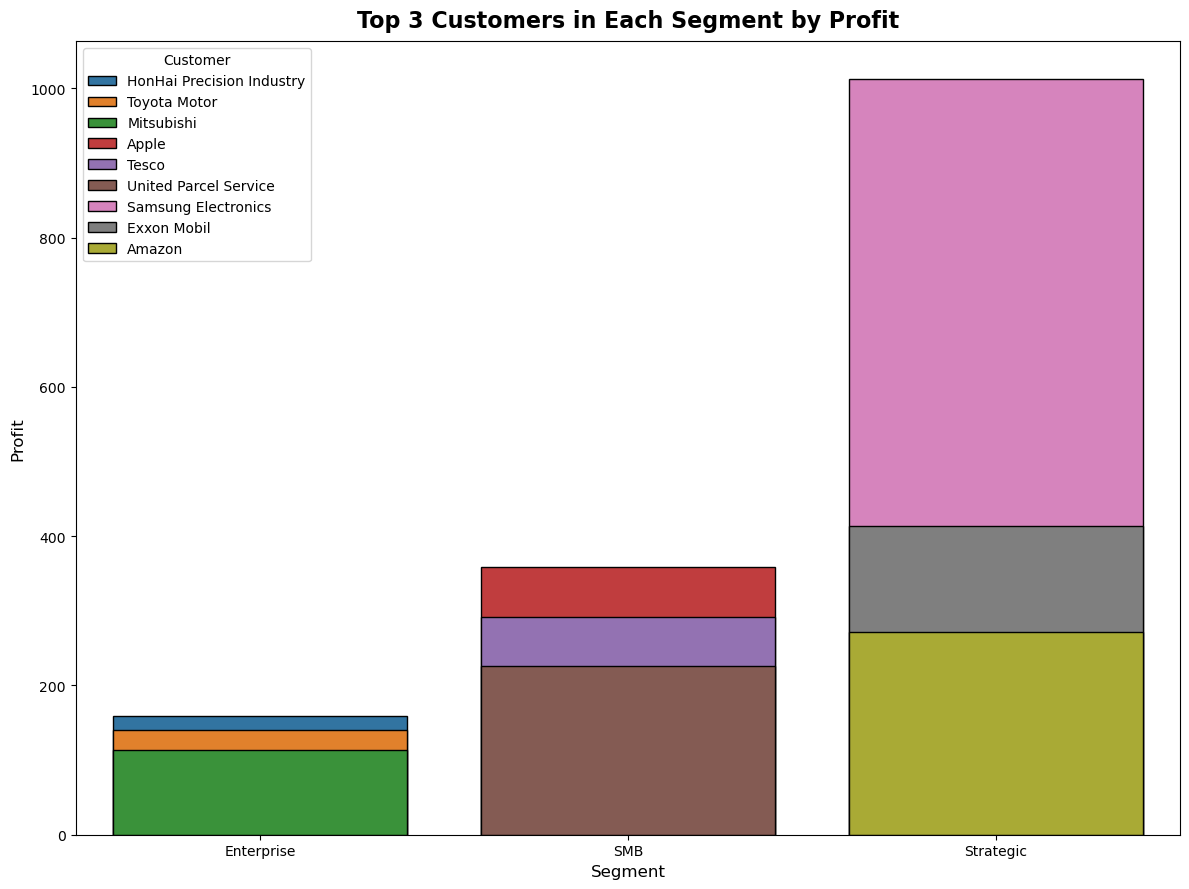

In [142]:
top3Customers = msSegment.groupby('Segment').apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)

plt.figure(figsize=(12, 9))

sns.barplot(
    data= top3Customers,
    x='Segment',
    y='Profit',
    hue='Customer',
    edgecolor='black',  
    dodge=False 
)

plt.title('Top 3 Customers in Each Segment by Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Customer', loc='upper left')

plt.tight_layout()
plt.show()


1. Di Enterprise Segment Honhai memiliki profit tertinggi diikuti oleh Toyota Motor dan Mitsubishi
2. Di SMB Segment Apple Service memiliki profit tertinggi diikuti oleh Tesco dan United Parcel
3. Di Strategic Segment Samsung memimpin profit terginggi diikuti oleh exxon dan amazon

Data ini dapat berguna untuk memahami pelanggan mana yang menghasilkan keuntungan paling besar di setiap segmen

In [143]:
bottom3Customers = msSegment.groupby('Segment').apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)
bottom3Customers

,Segment,Customer,Profit
0,Enterprise,Fannie Mae,-211.4700
1,Enterprise,Sony,-132.3154
2,Enterprise,News Corp.,-67.6704
3,SMB,Intel,-1597.0560
4,SMB,Nissan Motor,-1392.2704
5,SMB,Cisco Systems,-384.7164
6,Strategic,Banco Santander,-408.9124
7,Strategic,Phillips 66,-393.2583
8,Strategic,Bosch,-363.5280


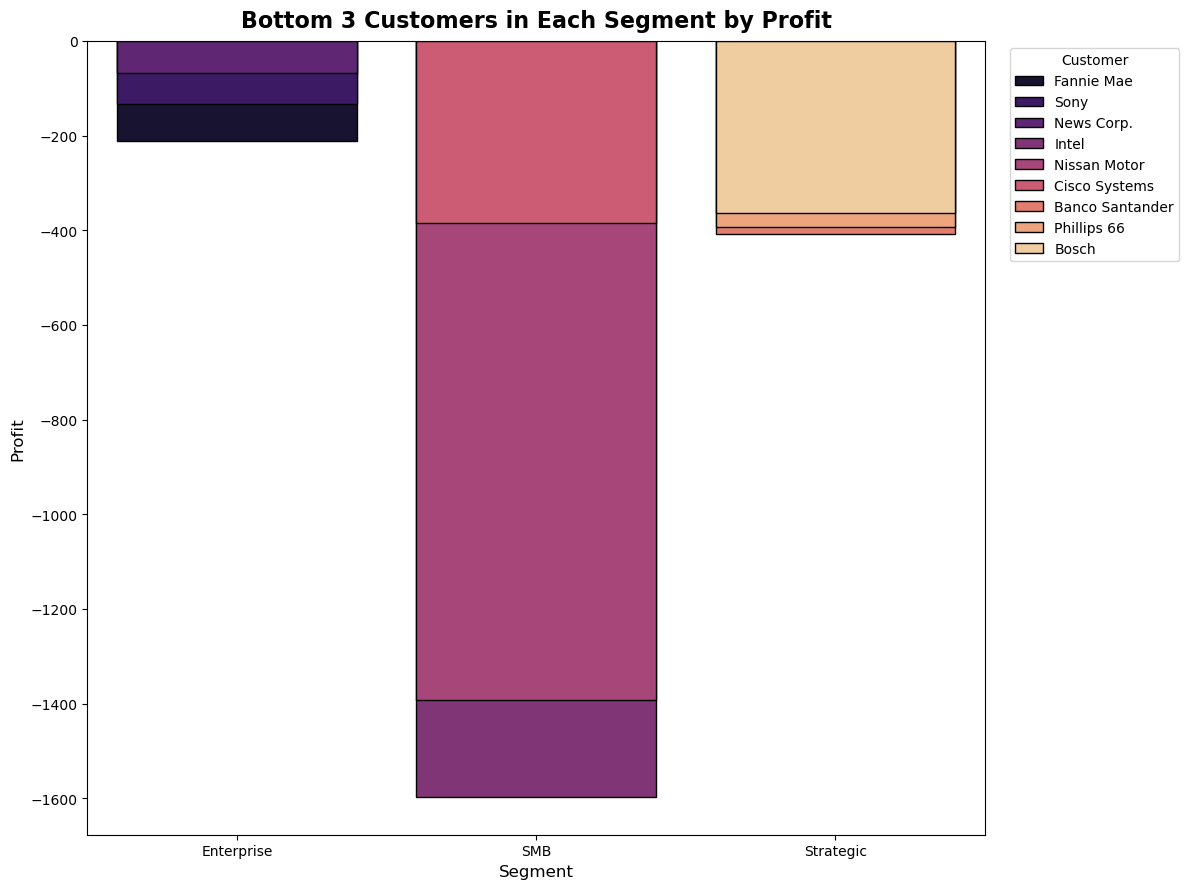

In [144]:
bottom3Customers = msSegment.groupby('Segment').apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)

plt.figure(figsize=(12, 9))

sns.barplot(
    data=bottom3Customers,
    x='Segment',
    y='Profit',
    hue='Customer',
    palette='magma',
    edgecolor='black',
    dodge=False
)

plt.title('Bottom 3 Customers in Each Segment by Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Customer', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


1. Di Enterprise Segment Fannie Mae memiliki kerugian tertinggi diikuti oleh Sony dan news corp
2. Di SMB Segment Intel memiliki kerugian tertinggi diikuti oleh Nissan dan Cisco
3. Di Strategic Segment Banco memimpin kerugian terginggi diikuti oleh Phillips dan Bosch

Data ini dapat berguna untuk memahami pelanggan mana yang paling banyak mengalami kerugian di setiap segmen. Mungkin bermanfaat untuk menganalisis lebih lanjut faktor-faktor yang berkontribusi terhadap kerugian ini dan mengembangkan strategi untuk meningkatkan kinerjanya.

Purchase Frequency by Customer in Marketing Suite

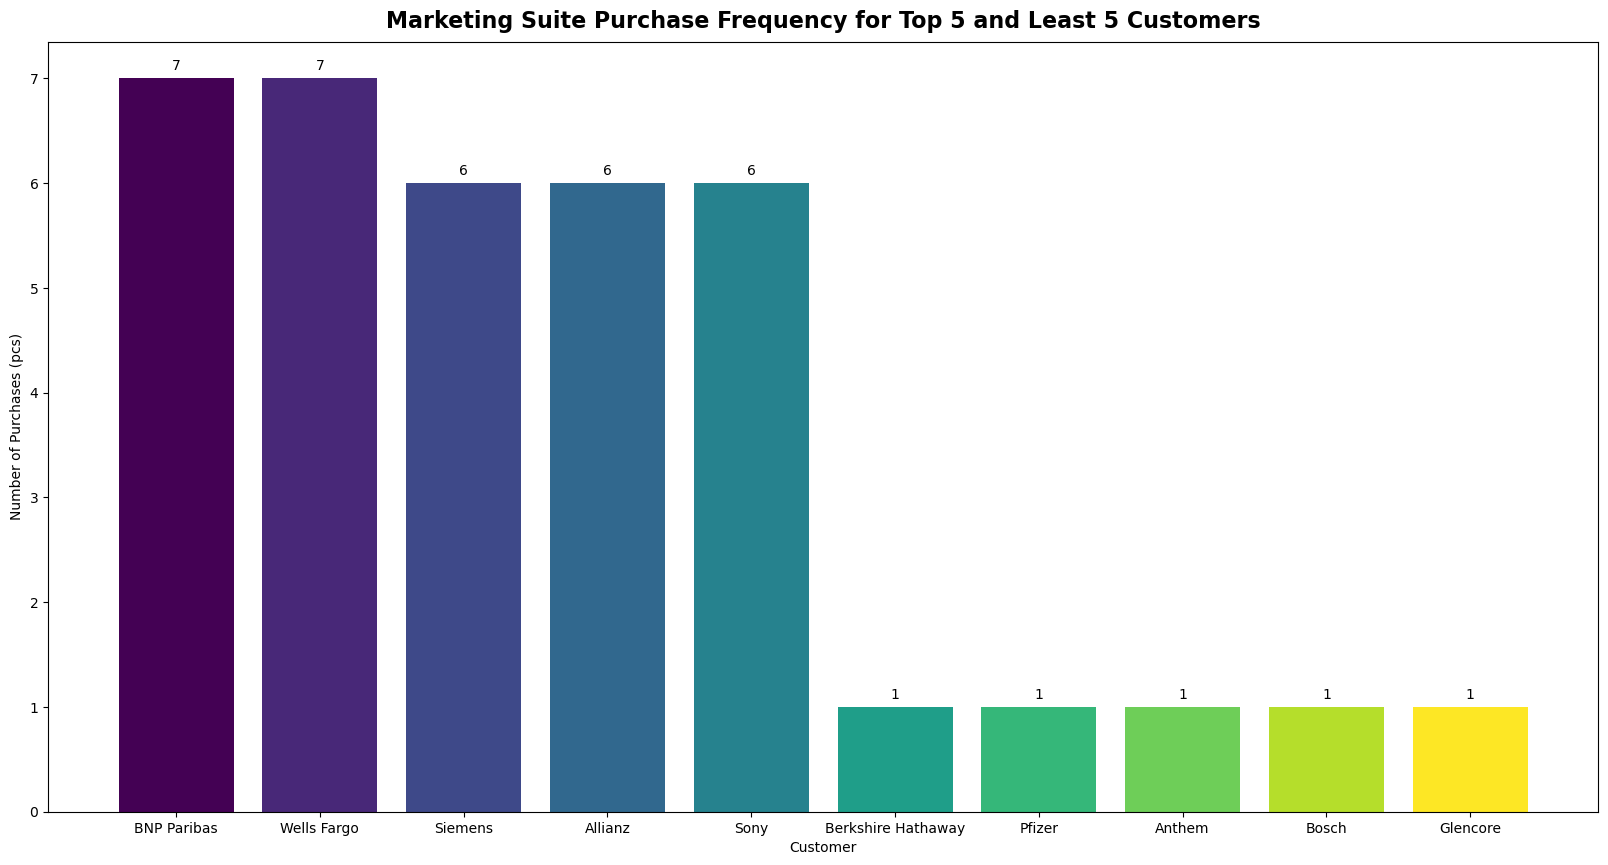

In [145]:
top5Custs = msDfCopy['Customer'].value_counts().nlargest(5)

bottom5Custs = msDfCopy['Customer'].value_counts().nsmallest(5)

selectedCustomers = pd.concat([top5Custs, bottom5Custs])

plt.figure(figsize=(20,10))

colors = plt.cm.viridis(np.linspace(0, 1, len(selectedCustomers)))

bars = plt.bar(selectedCustomers.index, selectedCustomers, color=colors)

plt.title('Marketing Suite Purchase Frequency for Top 5 and Least 5 Customers',size=16, pad=10, fontweight='bold')
plt.xlabel('Customer')
plt.ylabel('Number of Purchases (pcs)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

Frekuensi Pembelian Pelanggan: BNP Paribas dan Wells Fargo adalah pelanggan paling sering melakukan pembelian. Mungkin bermanfaat untuk memahami mengapa mereka sering melakukan pembelian meskipun produk tersebut menghasilkan keuntungan negatif.

Frekuensi Pembelian Rendah: Pelanggan dengan frekuensi pembelian rendah (Pelanggan Berkshire Hathaway, Pfizer, Anthem, Bosch, dan Glencore) mungkin memerlukan lebih banyak keterlibatan atau pemasaran bertarget untuk meningkatkan penggunaan produk.

Jika produk Marketing Suite secara konsisten menghasilkan laba negatif, mungkin ada baiknya melakukan analisis biaya-manfaat secara menyeluruh. Memahami struktur biaya produk dan nilai yang dirasakan pelanggan dapat memberikan wawasan apakah strategi penetapan harga memerlukan penyesuaian

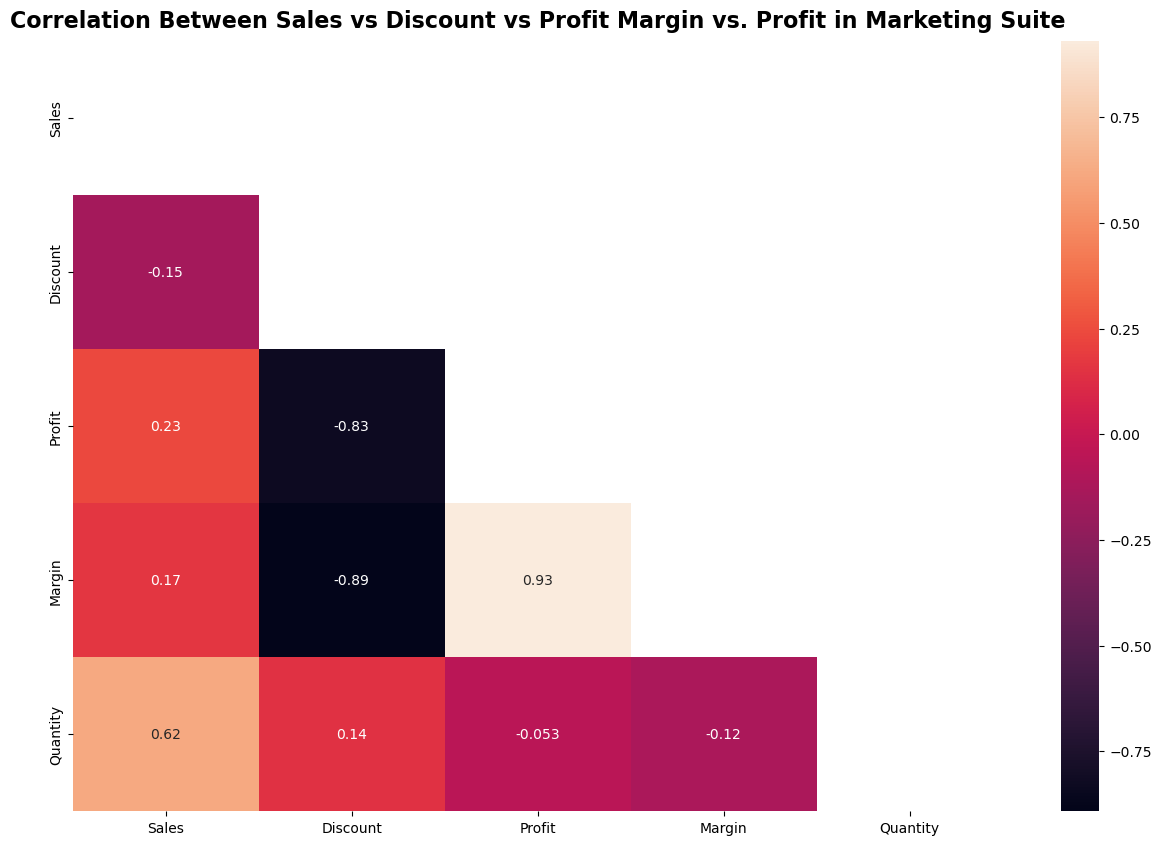

In [146]:
numerical = ["Sales", "Discount", "Profit", "Margin",'Quantity']
correlation = msDfCopy[numerical].corr(method = 'spearman')

plt.figure(figsize = (15, 10))
sns.heatmap(correlation, annot= True, mask = np.triu(correlation))
plt.title("Correlation Between Sales vs Discount vs Profit Margin vs. Profit in Marketing Suite", size=16, pad=10, fontweight='bold')
plt.show()

1. Profit dan Margin memiliki hubungan positif yang kuat, yang berarti semakin tinggi profit semakin tinggi juga marginnya
2. Sales dan Profit dan Margin memiliki hubungan positif yang lemah, berarti dengan meningkatnya penjualan makan Profit dan Margin juga ikut naik
3. Sales dan Discount memiliki hubungan negatif yang lemah, berarti dengan menurunnya sales dikarenakan tingginya diskon
4. Discount mempunyai hubungan negatif yang kuat dengan Profit dan Margin, berarti dengan semakin tingginya diskon, profit dan margin akan menurun drastis
5. Quantity mempunyai hubungan negatif yang lemah dengan Profit dan Margin, berarti semakin besar quantity akan menurunkan profit dan margin

Grafik heatmap memberikan kita informasi bagaimana setiap variable saling berhubungan. Misalnya walaupun diskon diberikan malah memberikan dampak negatif terhadap profit dan margin. Karena itu ada baiknya untuk mengatur ulang staregi diskon untuk memastikan bahwa diskon yang diberikan tidak menghilangkan profit secara signifikan,

# Kesimpulan

Marketing Suite merupakan produk yang menunjukan kerugian sepanjang periode dari data yang dianalisa. Produk ini cukup mengganggu tingkat profitablitas perusahaan. Tren negatif ini perlu mendapatkan perhatian dan invtervensi strategis dengan membuat strategi baru untuk mendongkrak kembali keuntungan dari Marketing Suite.

Dilihat dari berbagai analisa yang dilakukan, Marketing Suite terus menunjukan tren negatif. Terlihat dari analisa korelasi, analisa regional, sub-regional, negara, kota, dan juga segment bahwa Marketing Suite menghadapi tantangan di regional, sub-regional dan segment tertentu.

## Insight for Marketing Suite

1. Korelasi Discount-Profit:
    * Adanya korelasi negatif yang besar antara diskon yang diberikan dan profit yang didapatkan. Dengan semakin tinggi diskon yang diberikan, berbanding terbalik dengan profit yang didapatkan. Hal ini memerlukan peninjauan kembali strategi diskon yang diberikan. Seperti memberikan diskon jika pembelian melebihi nominal tertentu.

2. Analisa Regional:
    * Marketing Suite memiliki performa yang baik di wilayah tertentu seperti AMER namun mengalami kesulitan di wilayah seperti EMEA dan APJ, yang mencerminkan perlunya strategi yang disesuaikan di wilayah dengan kinerja buruk.

3. Trend Sub-Regional dan Country:
    * Profitabilitas bervariasi antar sub-wilayah dan negara. Meskipun ada daerah yang menghasilkan keuntungan, ada pula daerah yang mengalami kerugian besar. Misalnya, ketika Kanada dan Mesir menunjukkan keuntungan, Perancis dan Jepang menunjukkan kerugian yang besar.

4. City Performance:
    * Kota-kota tertentu menunjukkan keuntungan positif untuk Marketing Suite, seperti Helsinki dan New York City, sementara kota-kota lain seperti Paris dan Tokyo menghadapi kerugian besar.

5. Segment: 
    * Segmen SMB mewakili basis pelanggan terbesar, menunjukkan perlunya mengkalibrasi ulang strategi pemasaran untuk melayani segmen ini secara lebih efektif.

## Profitable Aspect

1. Frequency Customer:
    * Customer seperti BNP Paribas dan Wells Fargo, menunjukkan frekuensi pembelian yang tinggi meskipun Marketing Suite mendapatkan keuntungan negatif, yang menunjukkan sebenarnya ada potensi untuk menghasilkan profit yang cukup tinggi dari kedua customer ini.

2. Top Leader Profit by Segment:
    * Setiap Customer pada masing-masing segment merupakan perusahaan-perusahaan besar dan ternama, dan memberikan kontribusi keuntungan yang baik untuk perusahaan.

## Concern

1. Profitability Dynamic:
    * Adanya korelasi negatif yang besar antara diskon yang diberikan dan profit yang didapatkan. Dengan semakin tinggi diskon yang diberikan, berbanding terbalik dengan profit yang didapatkan. Hal ini memerlukan peninjauan kembali strategi diskon yang diberikan. Seperti memberikan diskon jika pembelian melebihi nominal tertentu.

2. Low Frequency Purchase:
    * Customer seperti Berkshire Hathaway, Pfizer, Anthem, Bosch, dan Glencore mungkin memerlukan strategi pemasaran tertentu atau adanya layanan after sales dan re-training untuk meningkatkan penggunaan Marketing Suite mereka.

3. Losses in Segments:
    * Setiap segment juga memberikan kerugian, sehingga diperlukan analisa lebih dalam untuk mengetahui faktor apa saja yg menjadi penyebabnya, dan melakukan pengaturan strategi untuk masing-masing segmen

## Recomendation

1. Mitigation Strategies:
    * Menganilisa kembali faktor-faktor yang menyebabkan kerugian, untuk mengembangkan strategi baru dan mengevaluasi kembali strateginya.

2. Pricing Strategy:
    * Lakukan analisa ulang tentang cost-benefit dari Marketing Suite. Hal ini akan membantu untuk menentukan harga yang bisa sejalan dengan kondisi pasar dan bersaing dengan kompetitor

3. Discount Strategy:
    * Mengoptimalkan strategi diskon, agar diskon bisa menaikan penjualan dan menaikan keuntungan. Misalnya dengan baru memberikan diskon setelah melewati batas pembelian minimum, atau bisa juga dengan menggunakan harga bertingkat.

4. Sales-Focused Initiatives:
    * Berfokus pada strategi untuk menaikan penjualan dengan tanpa bergantung pada diskon.